# 1. Objectif mesurable

**Objectif :** Prédire si une personne est infectée en fonction des données cliniques disponibles.

**Métrique :** f1-score -> 50% ; Recall -> 70%.

# 2. EDA - Exploratory Data Analysis

## infos sur le dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("/content/sample_data/DatasetCovid19.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [4]:
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

Pour tout afficher il faut utiliser la fonction set_option() de pandas:

In [5]:
pd.set_option('display.max_column', 111)
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

In [6]:
data.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [7]:
data.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
count  6.020000e+02                                      6.020000e+02   
mean  -7.866736e-09                                      1.014863e-09   
std    1.000832e+00                                      1.000832e+00   
min   -1.865070e+00                                     -5.431808e+00   
25%   -7.307069e-01                                     -5.524761e-01   
50%   -1.426696e-02                                     -5.458523e-02   
75%    5.976919e-01                                      6.424628e-01   
max    3.764100e+00                                      3.331071e+00   

         Leukocytes     Basophils  Mean corpuscular hemoglobin (MCH)  \
count  6.020000e+02  6.020000e+02                       6.020000e+02   
mean   6.215833e-09 -6.633739e-09                      -3.453010e-09   
std    1.000832e+00  1.000832e+00                       1.000832e+00   
min   -2.020303e+00 -1.140144e+00                      -5.937604e+00   
25%   -6.372547e-01 -5.292256e-01                      -5.013556e-01   
50%   -2.128790e-01 -2.237665e-01                       1.259032e-01   
75%    4.542955e-01  3.871516e-01                       5.963475e-01   
max    4.522042e+00  1.107822e+01                       4.098546e+00   

        Eosino

## copie du dataset

In [8]:
df = data.copy()

## Analyse de la forme des données

Target variable = "SARS-Cov-2 exam result"

### Identification du nombre de lignes et de colonnes:

In [9]:
df.shape

(5644, 111)

### Identification des différents types de variables:

In [10]:
df.dtypes


Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

Pour tout afficher il faut utiliser la fonction set_option() de pandas:

In [11]:
pd.set_option('display.max_rows', 111)
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
Patient addmited to intensive care unit (1=yes, 0=no)      int64
Hematocrit                                               float64
Hemoglobin                                               float64
Platelets                                                float64
Mean platelet volume                                     float64
Red blood Cells                                          float64
Lymphocytes                                              float64
Mean corpuscular hemoglobin concentration (MCHC)         float64
Leukocytes                                               float64
Basophils                                                float64
Mean corpuscular hemoglobin (MCH)                        float64
Eosinophils                                              float64
Mean corpuscular volume (MCV)                            float64
Monocytes                                                float64
Red blood cell distribution width (RDW)                  float64
Serum Glucose                                            float64
Respiratory Syncytial Virus                               object
Influenza A                                               object
Influenza B                                               object
Parainfluenza 1                                           object
CoronavirusNL63                                           object
Rhinovirus/Enterovirus                                    object
Mycoplasma pneumoniae                                    float64
Coronavirus HKU1                                          object
Parainfluenza 3                                           object
Chlamydophila pneumoniae                                  object
Adenovirus                                                object
Parainfluenza 4                                           object
Coronavirus229E                                           object
CoronavirusOC43                                           object
Inf A H1N1 2009                                           object
Bordetella pertussis                                      object
Metapneumovirus                                           object
Parainfluenza 2                                           object
Neutrophils                                              float64
Urea                                                     float64
Proteina C reativa mg/dL                                 float64
Creatinine                                               float64
Potassium                                                float64
Sodium                                                   float64
Influenza B, rapid test                                   object
Influenza A, rapid test                                   object
Alanine transaminase                                     float64
Aspartate transaminase                                   float64
Gamma-glutamyltransferase                                float64
Total Bilirubin                                          float64
Direct Bilirubin                                         float64
Indirect Bilirubin                                       float64
Alkaline phosphatase                                     float64
Ionized calcium                                          float64
Strepto A                                                 object
Magnesium                                                float64
pCO2 (venous blood gas analysis)                         float64
Hb saturation (venous blood gas analysis)                float64
Base excess (venous blood gas analysis)                  float64
pO2 (venous blood gas analysis)                          float64
Fio2 (venous blood gas analysis)   

In [12]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
Name: count, dtype: int64

### Identification des valeurs manquantes:

<Axes: >

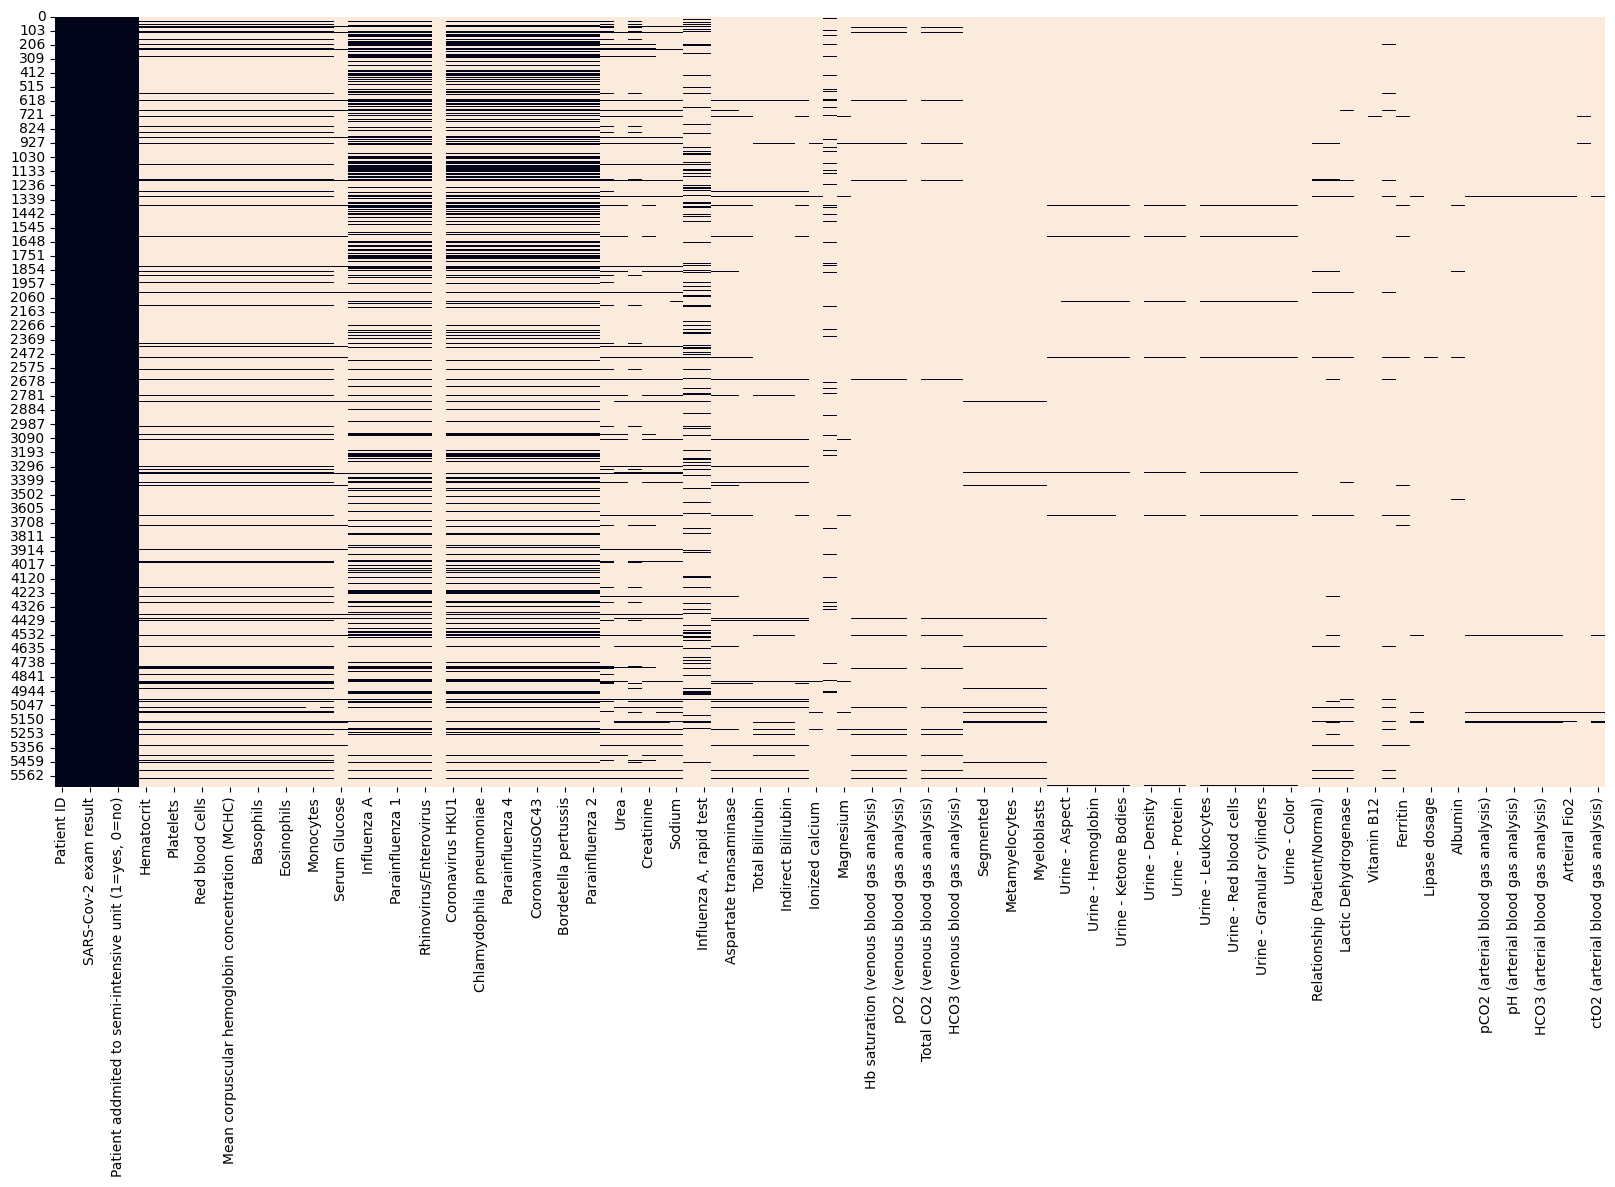

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [14]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinophils                                              5042
Mean corpuscular volume (MCV)                            5042
Monocytes                                                5043
Red blood cell distribution width (RDW)                  5042
Serum Glucose                                            5436
Respiratory Syncytial Virus                              4290
Influenza A                                              4290
Influenza B                                              4290
Parainfluenza 1                                          4292
CoronavirusNL63                                          4292
Rhinovirus/Enterovirus                                   4292
Mycoplasma pneumoniae                                    5644
Coronavirus HKU1                                         4292
Parainfluenza 3                                          4292
Chlamydophila pneumoniae                                 4292
Adenovirus                                               4292
Parainfluenza 4                                          4292
Coronavirus229E                                          4292
CoronavirusOC43                                          4292
Inf A H1N1 2009                                          4292
Bordetella pertussis                                     4292
Metapneumovirus                                          4292
Parainfluenza 2                                          4292
Neutrophils                                              5131
Urea                                                     5247
Proteina C reativa mg/dL                                 5138
Creatinine                                               5220
Potassium                                                5273
Sodium                                                   5274
Influenza B, rapid test                                  4824
Influenza A, rapid test                                  4824
Alanine transaminase                                     5419
Aspartate transaminase                                   5418
Gamma-glutamyltransferase                                5491
Total Bilirubin                                          5462
Direct Bilirubin                                         5462
Indirect Bilirubin                                       5462
Alkaline phosphatase                                     5500
Ionized calcium                                          5594
Strepto A                                                5312
Magnesium                                                5604
pCO2 (venous blood gas analysis)                         5508
Hb saturation (venous blood gas analysis)                5508
Base excess (venous blood gas analysis)                  5508
pO2 (venous blood gas analysis)                          5508
Fio2 (venous blood gas analysis)                         5643
Total CO2 (venous blood gas analysis)                    5508
pH (venous blood gas analysis)                           5508
HCO3 (venous blood gas analysis)

In [15]:
df.isna().sum()/df.shape[0]

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Eosinophils                                              0.893338
Mean corpuscular volume (MCV)                            0.893338
Monocytes                                                0.893515
Red blood cell distribution width (RDW)                  0.893338
Serum Glucose                                            0.963147
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Parainfluenza 1                                          0.760454
CoronavirusNL63                                          0.760454
Rhinovirus/Enterovirus                                   0.760454
Mycoplasma pneumoniae                                    1.000000
Coronavirus HKU1                                         0.760454
Parainfluenza 3                                          0.760454
Chlamydophila pneumoniae                                 0.760454
Adenovirus                                               0.760454
Parainfluenza 4                                          0.760454
Coronavirus229E                                          0.760454
CoronavirusOC43                                          0.760454
Inf A H1N1 2009                                          0.760454
Bordetella pertussis                                     0.760454
Metapneumovirus                                          0.760454
Parainfluenza 2                                          0.760454
Neutrophils                                              0.909107
Urea                                                     0.929660
Proteina C reativa mg/dL                                 0.910347
Creatinine                                               0.924876
Potassium                                                0.934266
Sodium                                                   0.934444
Influenza B, rapid test                                  0.854713
Influenza A, rapid test                                  0.854713
Alanine transaminase                                     0.960135
Aspartate transaminase                                   0.959957
Gamma-glutamyltransferase                                0.972892
Total Bilirubin                                          0.967753
Direct Bilirubin                                         0.967753
Indirect Bilirubin                                       0.967753
Alkaline phosphatase                                     0.974486
Ionized calcium                                          0.991141
Strepto A                                                0.941176
Magnesium                                                0.992913
pCO2 (venous blood gas analysis)                         0.975904
Hb saturation (venous blood gas analysis)                0.975904
Base excess (venous blood gas analysis)                  0.975904
pO2 (venous blood gas analysis)         

In [16]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Influenza A                                              0.760099
Respiratory Syncytial Virus                              0.760099
Parainfluenza 1                                          0.760454
Rhinovirus/Enterovirus                                   0.760454
Coronavirus HKU1                                         0.760454
Chlamydophila pneumoniae                                 0.760454
CoronavirusNL63                                          0.760454
Parainfluenza 3                                          0.760454
Adenovirus                                               0.760454
Inf A H1N1 2009                                          0.760454
Parainfluenza 2                                          0.760454
Metapneumovirus                                          0.760454
Bordetella pertussis                                     0.760454
Coronavirus229E                                          0.760454
CoronavirusOC43                                          0.760454
Parainfluenza 4                                          0.760454
Influenza A, rapid test                                  0.854713
Influenza B, rapid test                                  0.854713
Hemoglobin                                               0.893161
Hematocrit                                               0.893161
Leukocytes                                               0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Lymphocytes                                              0.893338
Red blood Cells                                          0.893338
Basophils                                                0.893338
Platelets                                                0.893338
Eosinophils                                              0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Red blood cell distribution width (RDW)                  0.893338
Mean corpuscular volume (MCV)                            0.893338
Monocytes                                                0.893515
Mean platelet volume                                     0.893870
Neutrophils                                              0.909107
Proteina C reativa mg/dL                                 0.910347
Creatinine                                               0.924876
Urea                                                     0.929660
Potassium                                                0.934266
Sodium                                                   0.934444
Strepto A                                                0.941176
Aspartate transaminase                                   0.959957
Alanine transaminase                                     0.960135
Serum Glucose                                            0.963147
Indirect Bilirubin                                       0.967753
Direct Bilirubin                                         0.967753
Total Bilirubin                                          0.967753
Gamma-glutamyltransferase                                0.972892
Alkaline phosphatase                                     0.974486
pH (venous blood gas analysis)                           0.975904
pCO2 (venous blood gas analysis)                         0.975904
Total CO2 (venous blood gas analysis)                    0.975904
Hb saturation (venous blood gas analysis)                0.975904
Base excess (venous blood gas analysis)                  0.975904
pO2 (venous blood gas analysis)                          0.975904
HCO3 (venous blood gas analysis)        

## Analyse du fond

### Visualisation initiale - Elimination des colonnes inutiles:

Supression de toutes les colonnes avec plus de 90% de NaN.

In [17]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

Vérifions notre graph de NaN avec les colonnes qui ont moins de 90% de NaN:

<Axes: >

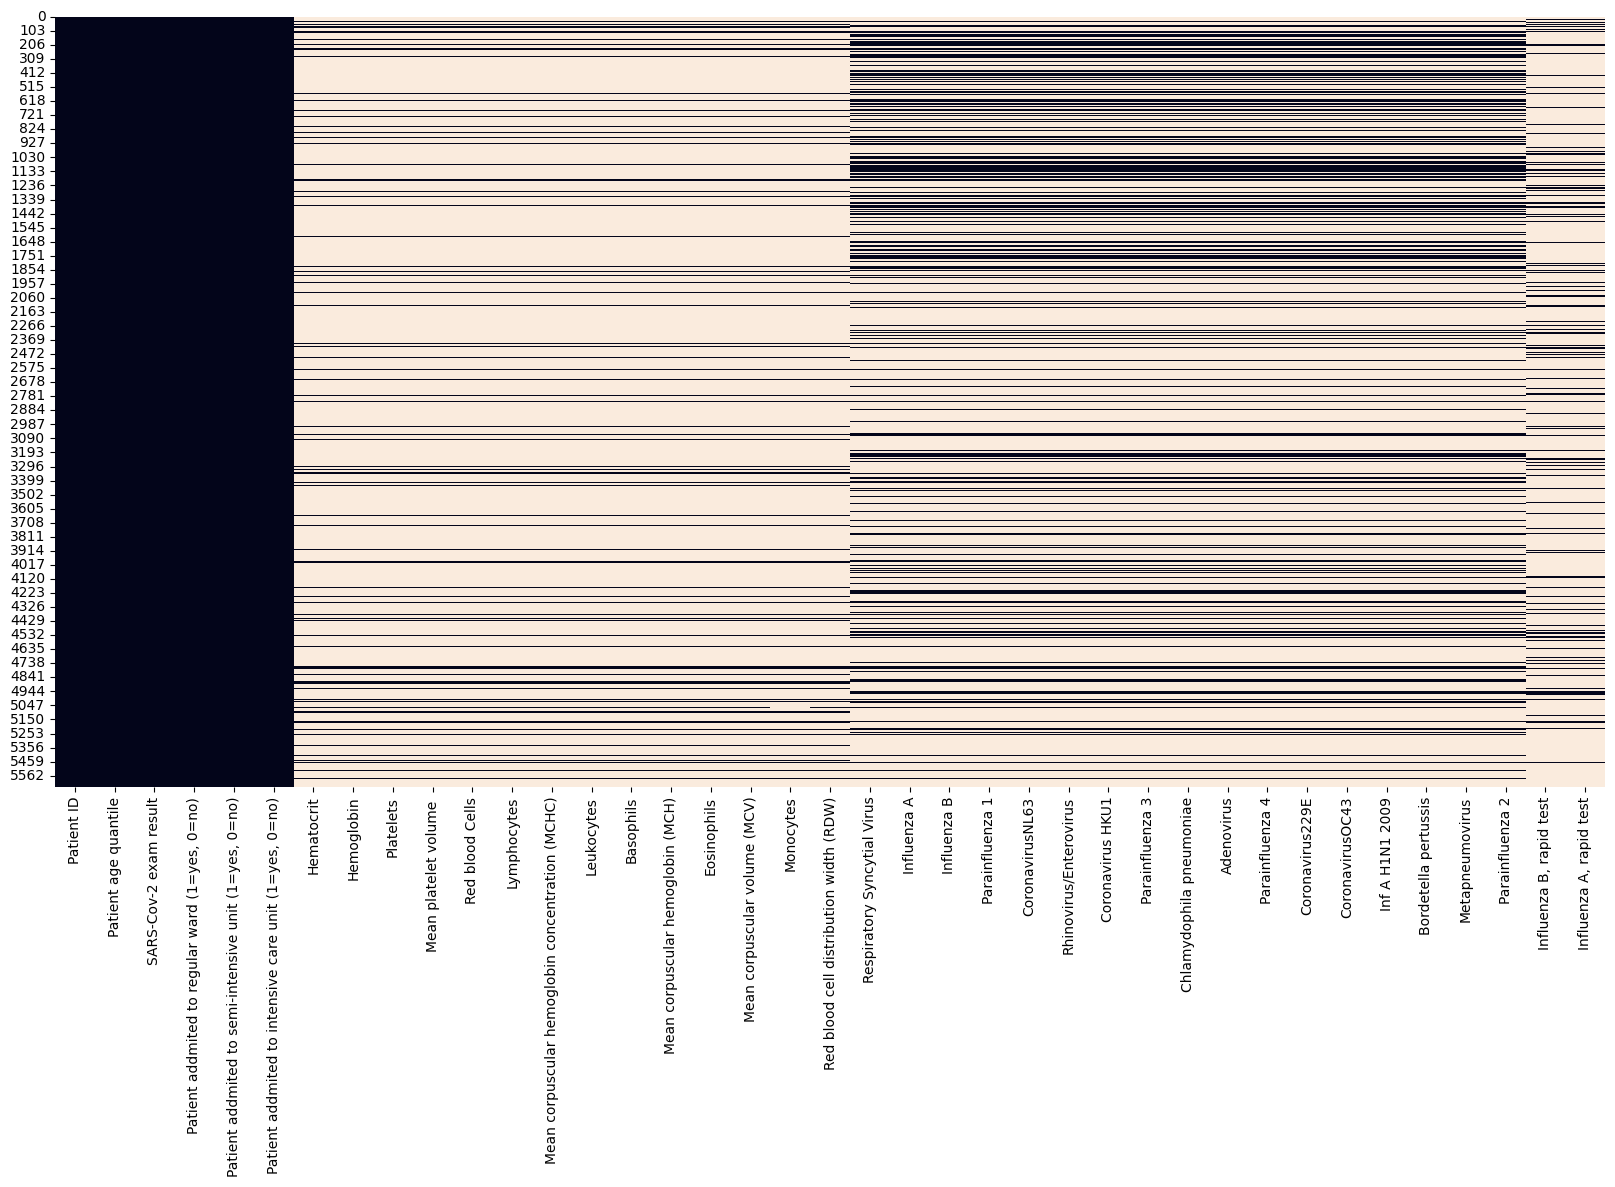

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

Malgré que nous avons 100% de valeurs dans la colonne 'Patient ID', cette colonne ne sert à rien dans l'analyse, nous allons donc l'enlever:

In [19]:
df = df.drop(['Patient ID'], axis=1)

### Visualisation de la target

nous allons compter le nombre de cas positifs et le nombre de cas négatifs:

In [20]:
df['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    5086
positive     558
Name: count, dtype: int64

Nous pouvons affirmer que nos classes ne sont pas équilibrées. Nous devrons utiliser des techniques de métriques plus tard.

In [21]:
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

SARS-Cov-2 exam result
negative    0.901134
positive    0.098866
Name: proportion, dtype: float64

### Compréhension des différentes variables

Nous allons créer les histogrammes des variables continues:

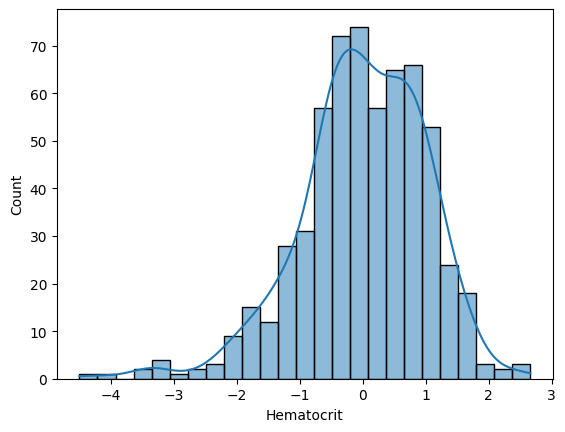

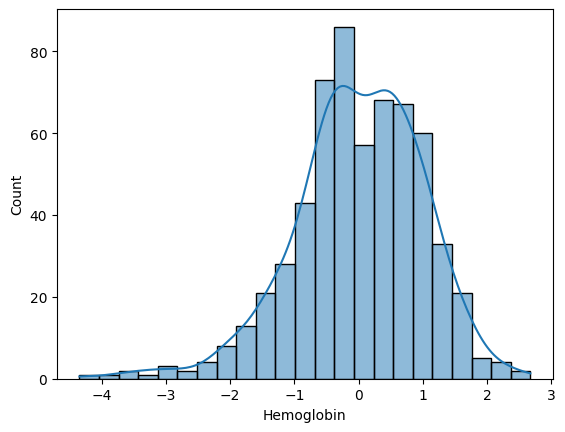

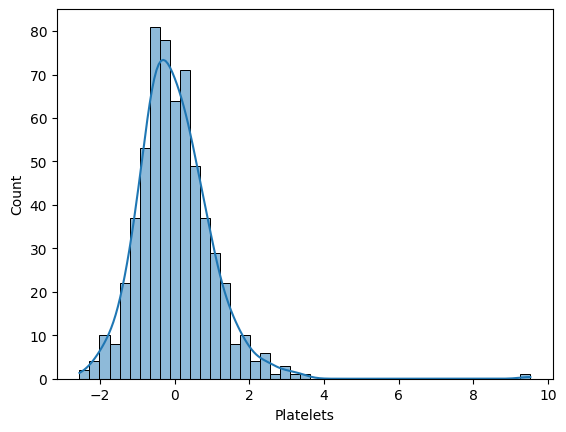

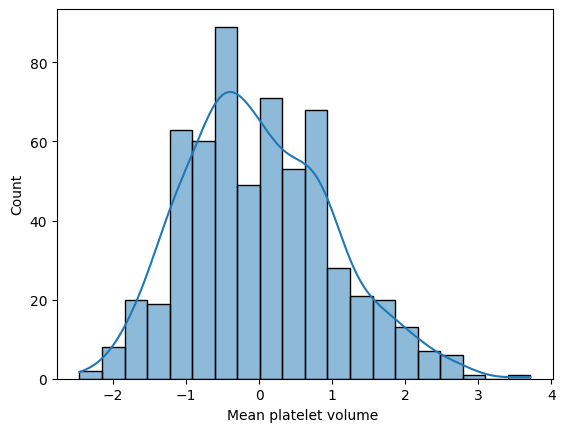

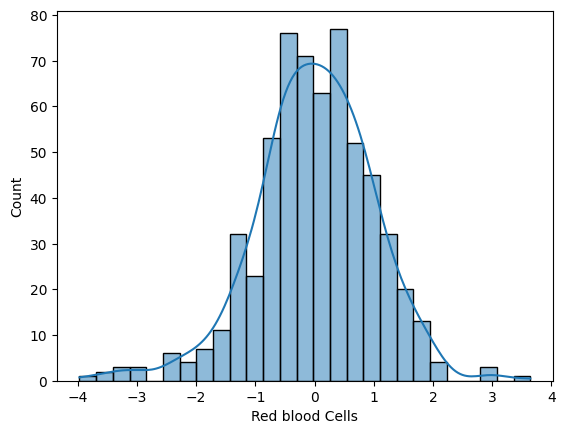

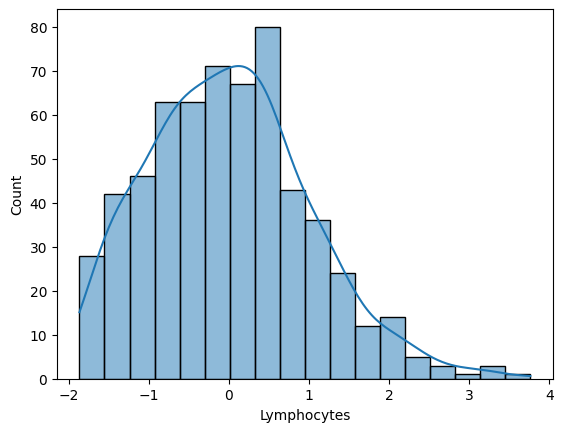

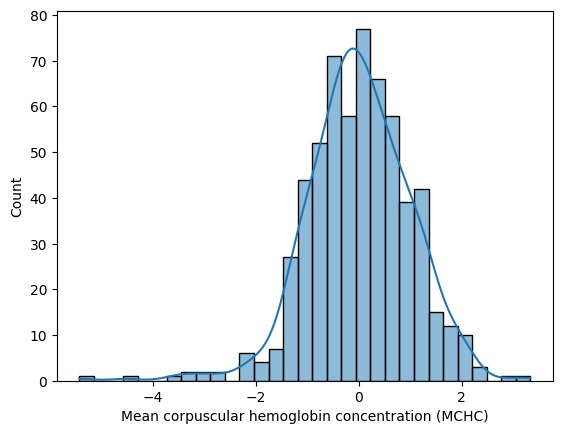

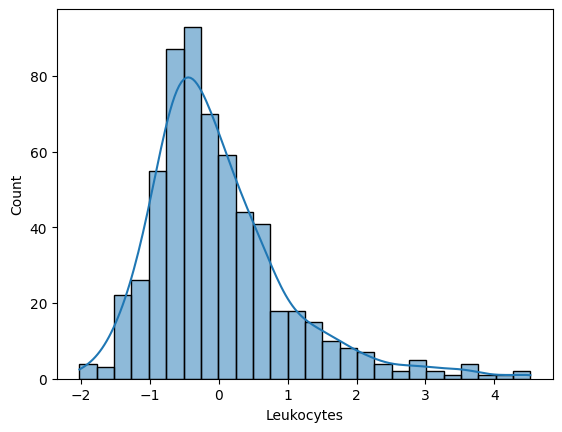

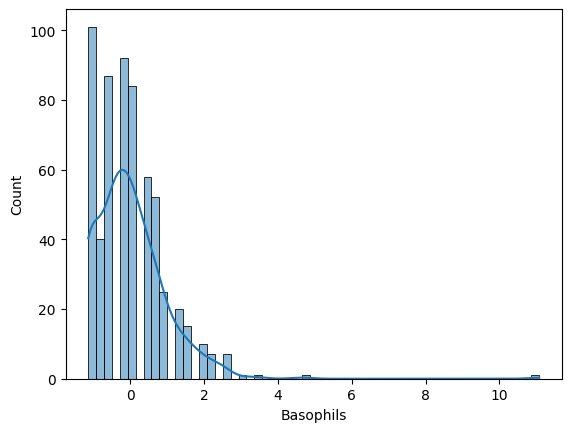

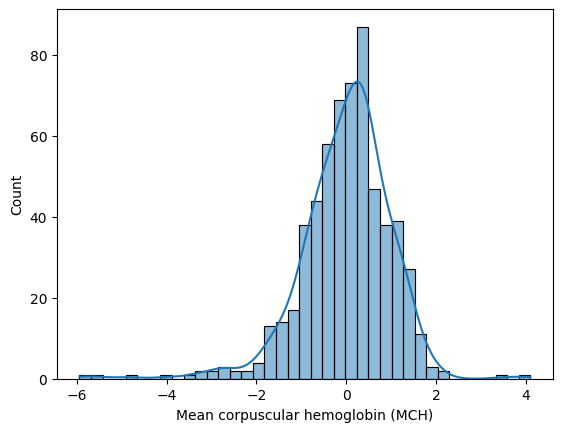

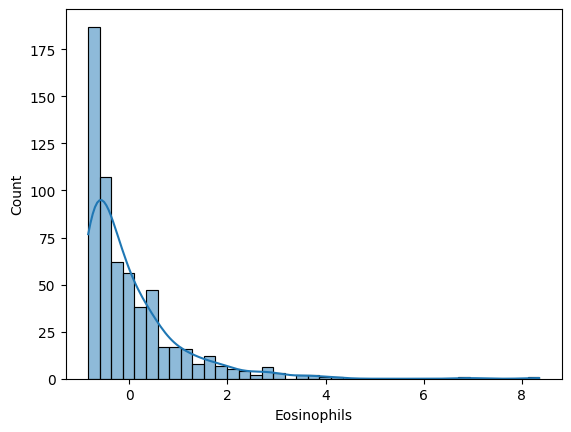

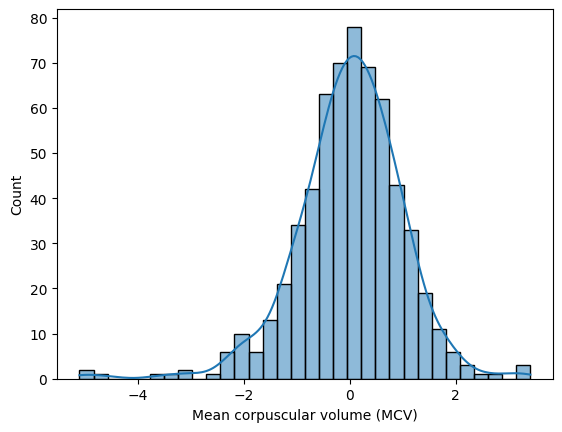

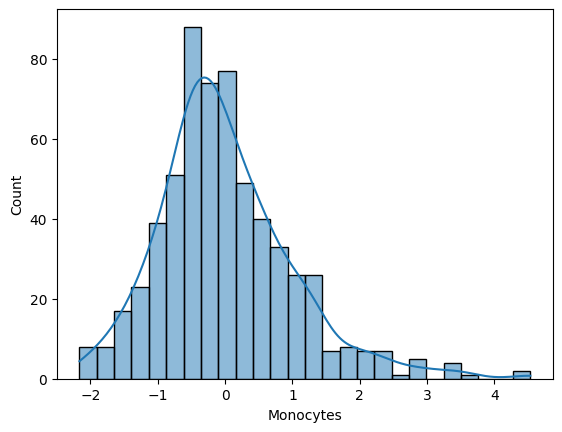

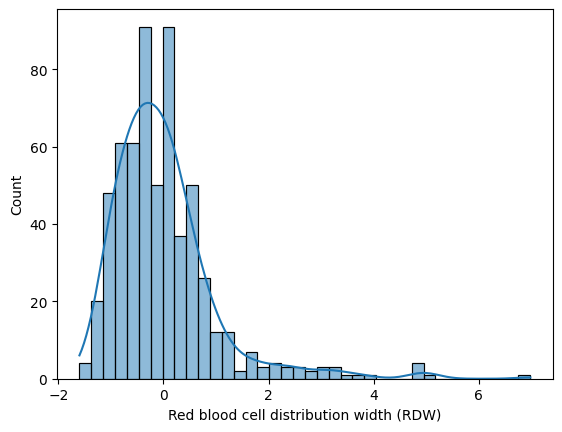

In [22]:
for col in df.select_dtypes('float'):
  plt.figure()
  sns.histplot(df[col], kde=True)

La première chose que nous pouvons observer est que toutes nos courbes sont centrées en 0 et ont l'air d'avoir un écart type = 1. Nous comprenons donc que ces données ont été standardisées.
Plusieurs variables suivent une distribution normale tandis que quelques-unes suivent une distribution asymétrique (skewed).

Maintenant nous allons faire le graphique de la colonnes 'Patient age quantile':

<Axes: xlabel='Patient age quantile', ylabel='Count'>

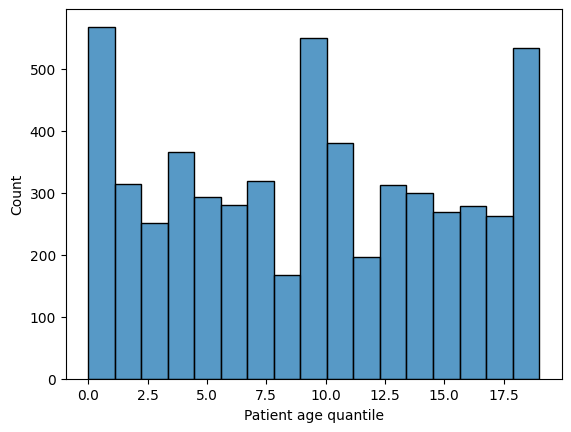

In [23]:
sns.histplot(df['Patient age quantile'])

In [24]:
df['Patient age quantile'].value_counts()

Patient age quantile
11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: count, dtype: int64

Valeurs entre 0 et 19: cela peut sembler curieux, nous n'avons aucun moyen de savoir à quoi correspondent ces valeurs. Nous pouvons donc formuler l'hypothèse que ces valeurs sont des tranches d'âges (par exemple 0 = de 0 à 5 ans etc.) ou que les valeurs ont subi une transformation mathématique. Quoiqu'il en soit, ce n'est pas très important.

Nous passons aux variables qualitatives:

In [25]:
for col in df.select_dtypes('object'):
  print(f'{col :-<30}, {df[col].unique()}')


SARS-Cov-2 exam result--------, ['negative' 'positive']
Respiratory Syncytial Virus---, [nan 'not_detected' 'detected']
Influenza A-------------------, [nan 'not_detected' 'detected']
Influenza B-------------------, [nan 'not_detected' 'detected']
Parainfluenza 1---------------, [nan 'not_detected' 'detected']
CoronavirusNL63---------------, [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus--------, [nan 'detected' 'not_detected']
Coronavirus HKU1--------------, [nan 'not_detected' 'detected']
Parainfluenza 3---------------, [nan 'not_detected' 'detected']
Chlamydophila pneumoniae------, [nan 'not_detected' 'detected']
Adenovirus--------------------, [nan 'not_detected' 'detected']
Parainfluenza 4---------------, [nan 'not_detected' 'detected']
Coronavirus229E---------------, [nan 'not_detected' 'detected']
CoronavirusOC43---------------, [nan 'not_detected' 'detected']
Inf A H1N1 2009---------------, [nan 'not_detected' 'detected']
Bordetella pertussis----------, [nan 'not_detect

Nous pouvons voir que toutes nos valeurs sont binaires ('negative' - 'positive' ou 'not_detected' - 'detected') sauf pour 'Parainfluenza 2' où il n'y a qu'une seule valeur (cette colonne ne nous ervira donc probablement pas).

Nous allons maintenant visualiser le nombre de chaque valeur qu'il y a dans chaque catégorie:

SARS-Cov-2 exam result, Axes(0.22375,0.11;0.5775x0.77)
Respiratory Syncytial Virus, Axes(0.22375,0.11;0.5775x0.77)
Influenza A, Axes(0.22375,0.11;0.5775x0.77)
Influenza B, Axes(0.22375,0.11;0.5775x0.77)
Parainfluenza 1, Axes(0.22375,0.11;0.5775x0.77)
CoronavirusNL63, Axes(0.22375,0.11;0.5775x0.77)
Rhinovirus/Enterovirus, Axes(0.22375,0.11;0.5775x0.77)
Coronavirus HKU1, Axes(0.22375,0.11;0.5775x0.77)
Parainfluenza 3, Axes(0.22375,0.11;0.5775x0.77)
Chlamydophila pneumoniae, Axes(0.22375,0.11;0.5775x0.77)
Adenovirus, Axes(0.22375,0.11;0.5775x0.77)
Parainfluenza 4, Axes(0.22375,0.11;0.5775x0.77)
Coronavirus229E, Axes(0.22375,0.11;0.5775x0.77)
CoronavirusOC43, Axes(0.22375,0.11;0.5775x0.77)
Inf A H1N1 2009, Axes(0.22375,0.11;0.5775x0.77)
Bordetella pertussis, Axes(0.22375,0.11;0.5775x0.77)
Metapneumovirus, Axes(0.22375,0.11;0.5775x0.77)
Parainfluenza 2, Axes(0.22375,0.11;0.5775x0.77)
Influenza B, rapid test, Axes(0.22375,0.11;0.5775x0.77)
Influenza A, rapid test, Axes(0.22375,0.11;0.5775x0.

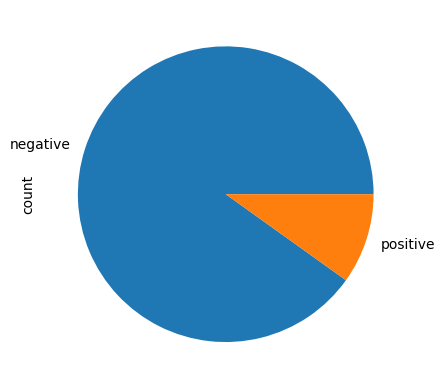

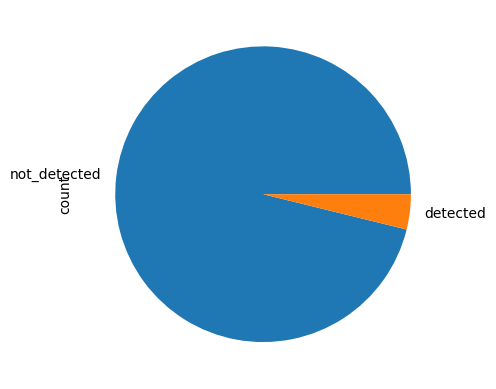

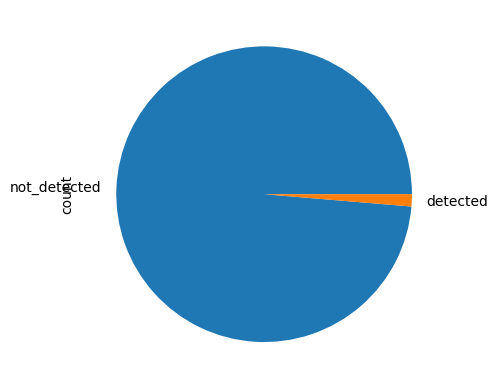

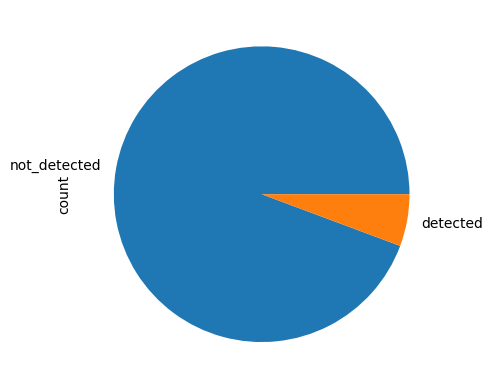

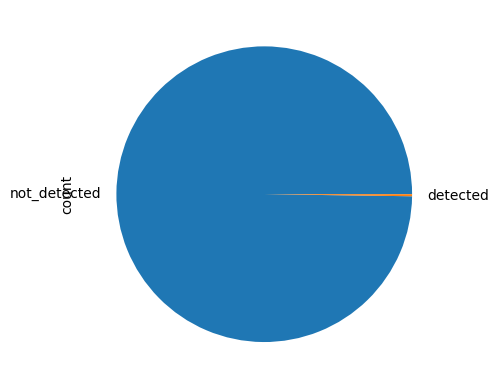

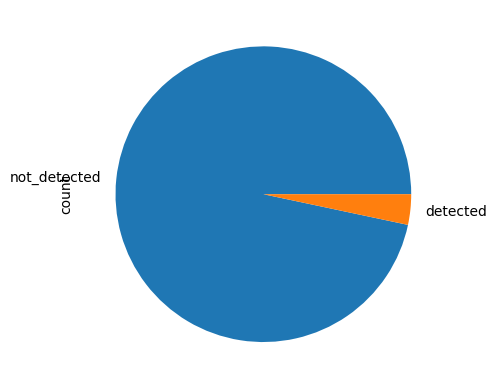

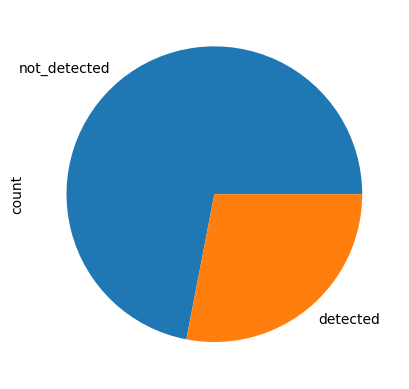

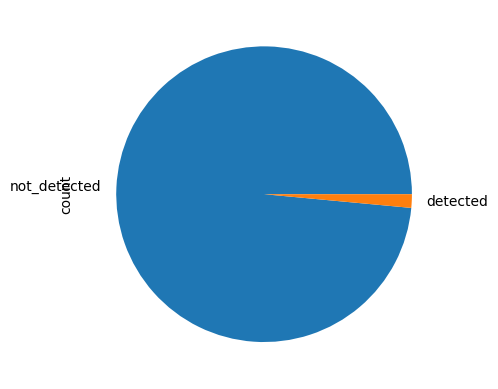

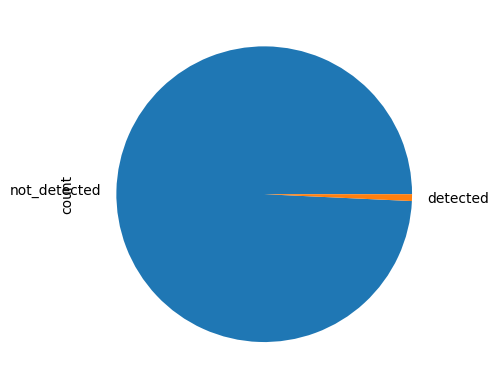

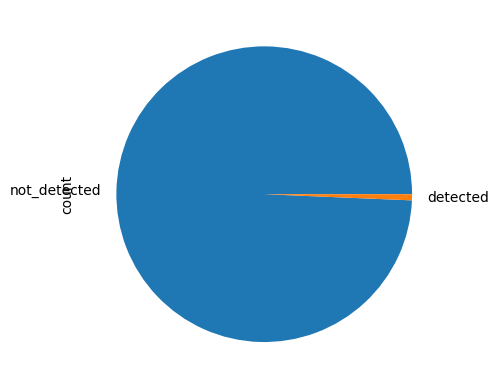

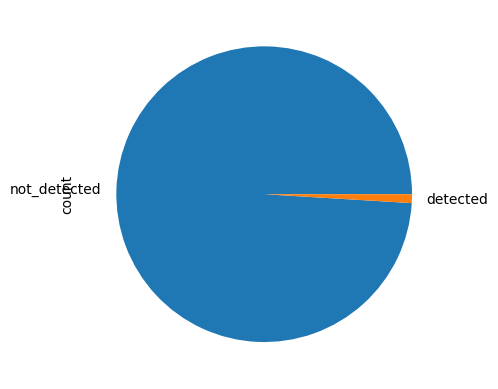

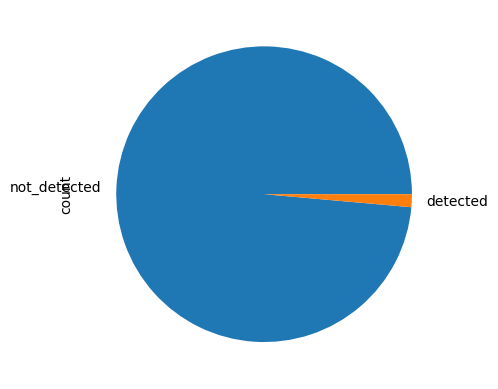

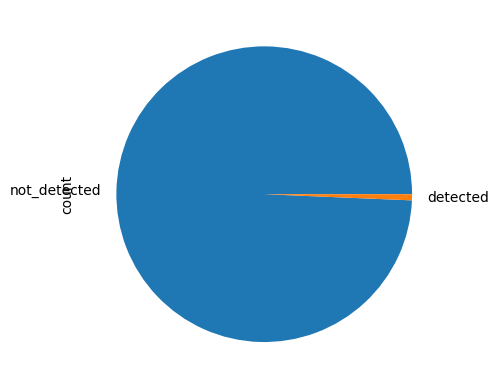

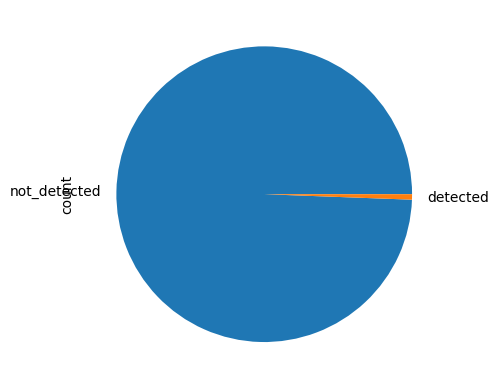

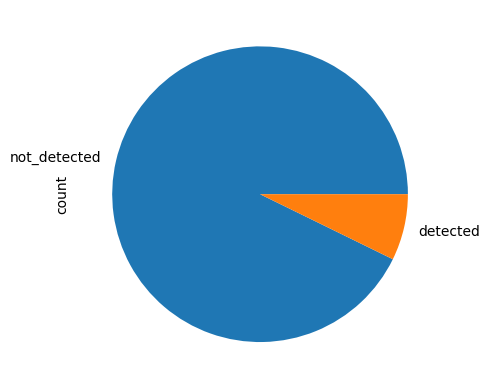

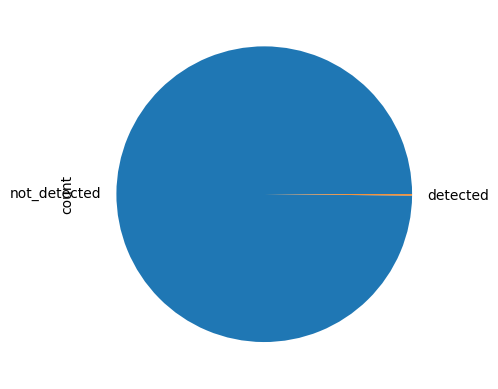

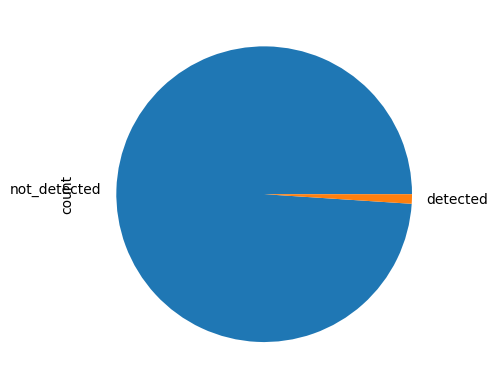

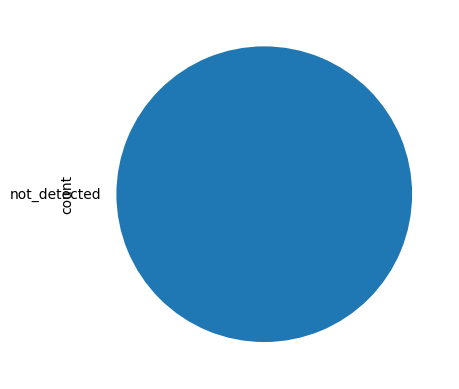

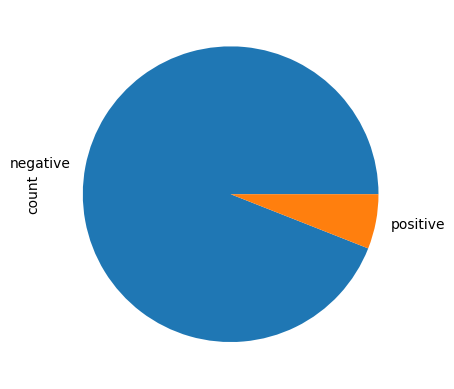

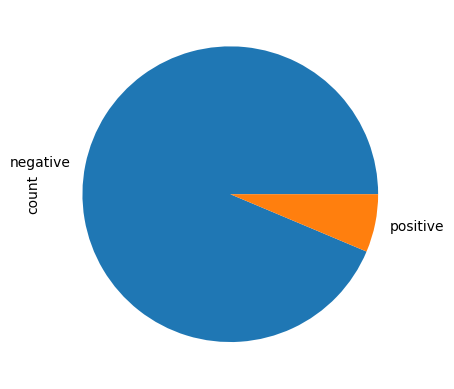

In [26]:
for col in df.select_dtypes('object'):
  plt.figure()
  print(f'{col}, {df[col].value_counts().plot.pie()}')

Tout semble 'negative' ou 'not_detected' sauf le 'Rhinovirus/Enterovirus' qui semble très élevé.

### Visualisation des relations features-target

Création de sous-ensembles positifs et négatifs:

In [27]:
postive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
postive_df

Patient age quantile SARS-Cov-2 exam result  \
67                       7               positive   
284                     16               positive   
513                     10               positive   
568                      2               positive   
676                     15               positive   
...                    ...                    ...   
5632                    16               positive   
5633                     4               positive   
5634                    15               positive   
5639                     3               positive   
5643                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
67           NaN        NaN                    NaN              NaN   
284          NaN        NaN                    NaN              NaN   
513          NaN        NaN                    NaN              NaN   
568     0.792188  -0.341548               1.469188         1.653476   
676          NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5632         NaN        NaN                    NaN              NaN   
5633         NaN        NaN                    NaN              NaN   
5634         NaN        NaN                    NaN              NaN   
5639         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903         0.578024   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
67            NaN                                               NaN   
284           NaN                          

In [28]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']
negative_df

Patient age quantile SARS-Cov-2 exam result  \
0                       13               negative   
1                       17               negative   
2                        8               negative   
3                        5               negative   
4                       15               negative   
...                    ...                    ...   
5637                    12               negative   
5638                    14               negative   
5640                    17               negative   
5641                     4               negative   
5642                    10               negative   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5637                                               0   
5638                                               0   
5640                                               0   
5641                                               0   
5642                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5637                                                  0       
5638                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5637                                                  0             NaN   
5638                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1       -0.02234  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5637         NaN        NaN                    NaN              NaN   
5638         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   

      Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
0             NaN                                               NaN   
1        0.318366                          

Nous allons créer des variables basées sur les valeurs manquantes pour filtrer notre dataset en fonction des résultats obtenus dans l'étape d'identification de valeurs manquantes.

Création des sous ensembles Blood (taux sanguins) et viral (test viral):

In [29]:
missing_rate = df.isna().sum()/df.shape[0]

In [30]:
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [31]:
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

Visualisation Target / Blood (target / variables continues)

/tmp/ipython-input-2712665310.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(postive_df[col], label = 'positive', kde=True)
/tmp/ipython-input-2712665310.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(negative_df[col], label = 'negative', kde=True)
/tmp/ipython-input-2712665310.py:3: U

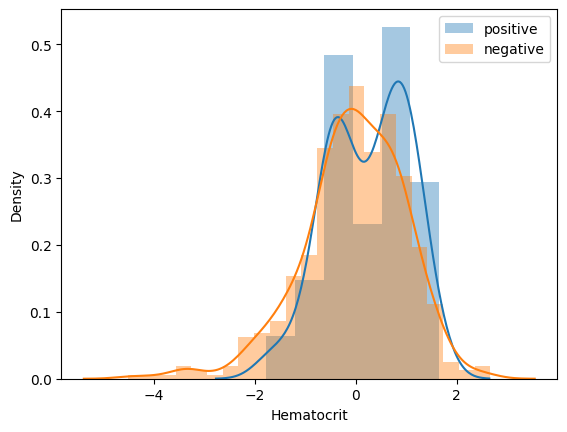

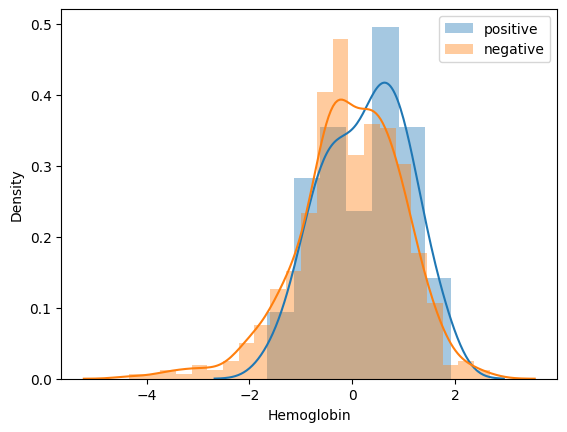

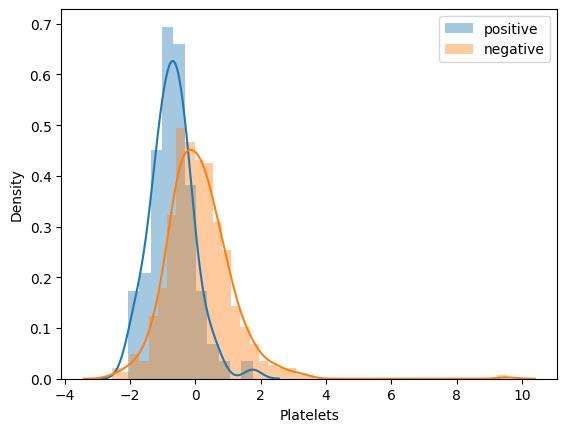

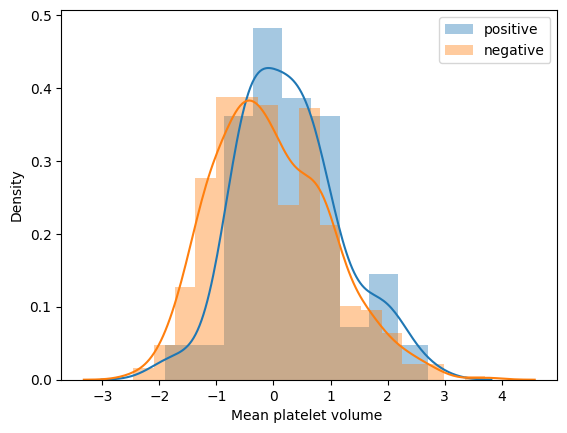

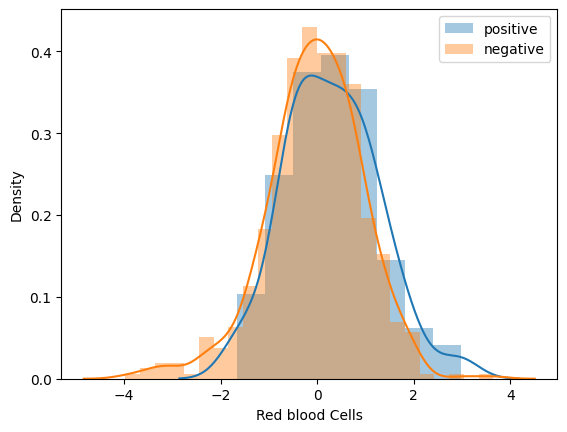

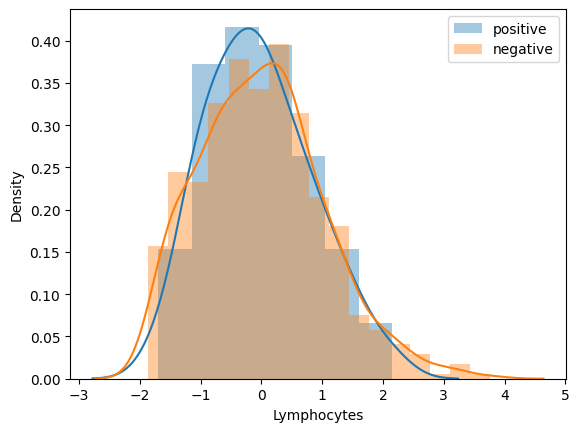

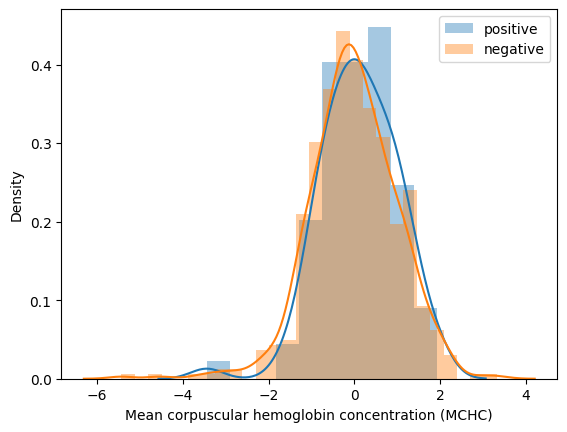

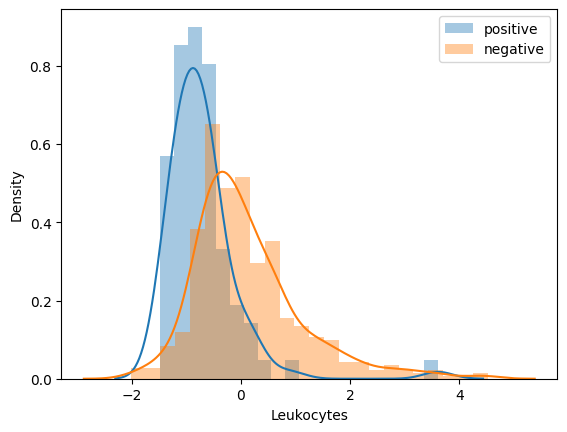

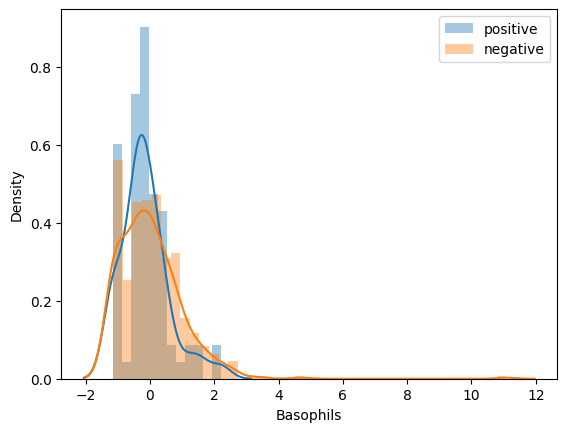

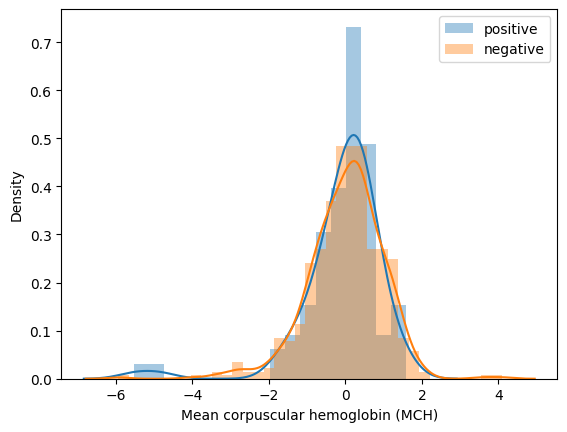

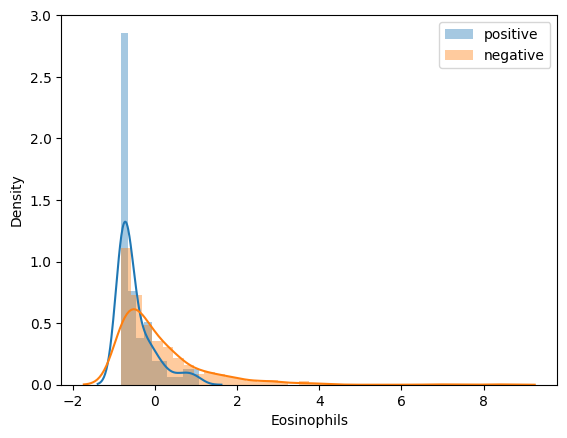

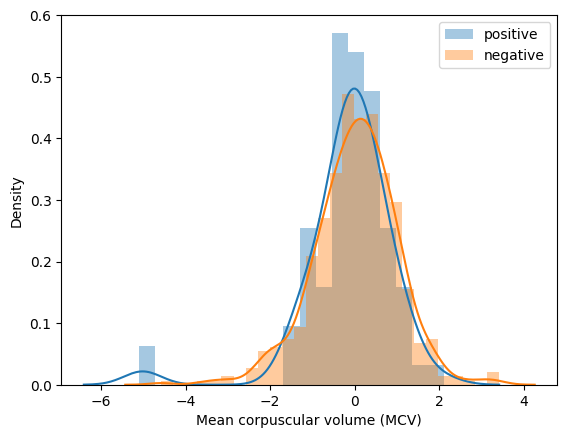

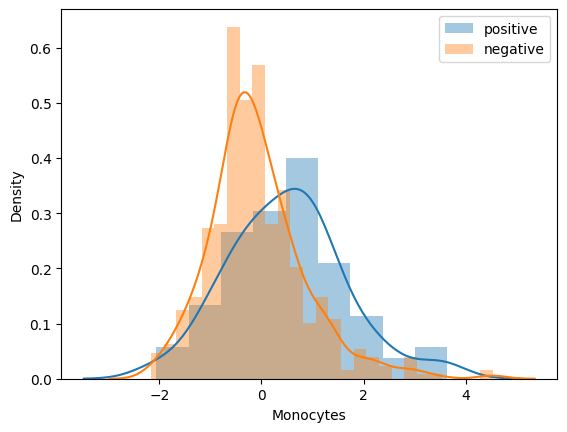

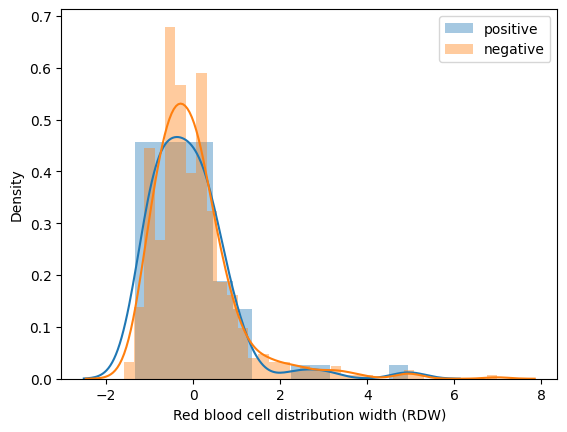

In [32]:
for col in blood_columns:
  plt.figure()
  sns.distplot(postive_df[col], label = 'positive', kde=True)
  sns.distplot(negative_df[col], label = 'negative', kde=True)
  plt.legend()

Nous observons que les taux de Platelets, Leukocytes, Monocytes semblent liés au COVID-19 -> **hypothèse à tester**.

Relation Target / Age

<Axes: xlabel='Patient age quantile', ylabel='count'>

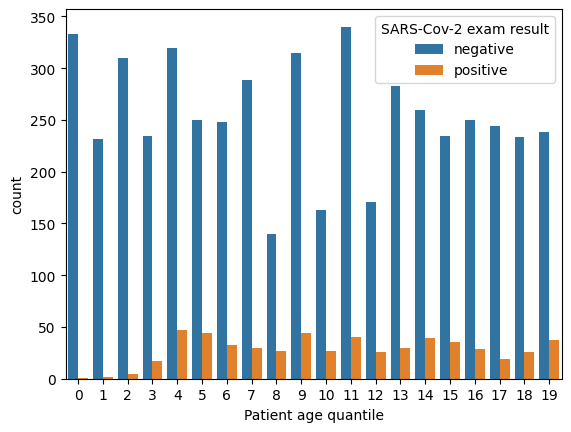

In [33]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

Dans ce graphique on compte le nombre d'apparitions de chaque 'Patient age quantile' pour les résulats positifs et négatifs de 'SARS-Cov-2 exam result'.
Ce graphique semble nous indiquer que l'age est lié au fait d'etre positif ou négatif au COVID-19. Nous avons envie de dire que les individus de faible age sont peu contaminés. Cependant, comme dis plus haut nous n'avons pas trop d'informations quant à la variable 'Patient age quantile'. Cette variable reste tout de meme interéssante pour effectuer **une comparaison avec les résultats de test sanguins**.

Relation Target / Viral (target / variables qualitatives)

Etant donné que target et viral sont des 'object' et non des nombres nous allons utiliser un CrossTab. Voici un exemple de CrossTab:

In [34]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])


Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

Nous observons les croisements pour les cas positifs et négatifs des deux virus. Par exemple, nous pouvons voir que 18 personnes qui touchés par le Influenza A dont négatifs au COVID-19, dans notre dataset personne n'est infecté par le Influenza A et par le COVID-19 en meme temps, etc.

Maintenant nous allons créer des heatmap qui contiennent nos CrossTab pour toutes les colonnes et la target:

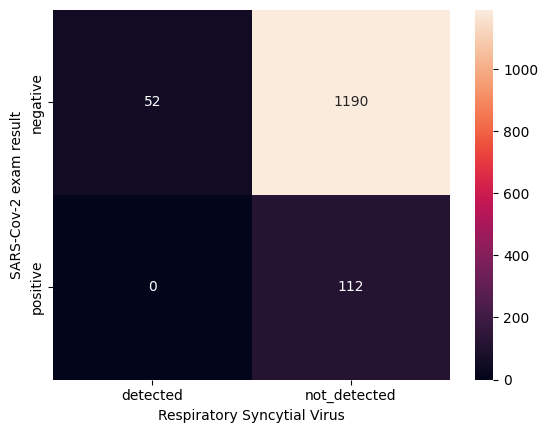

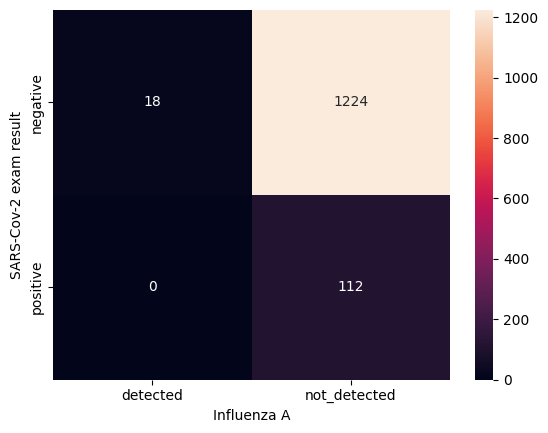

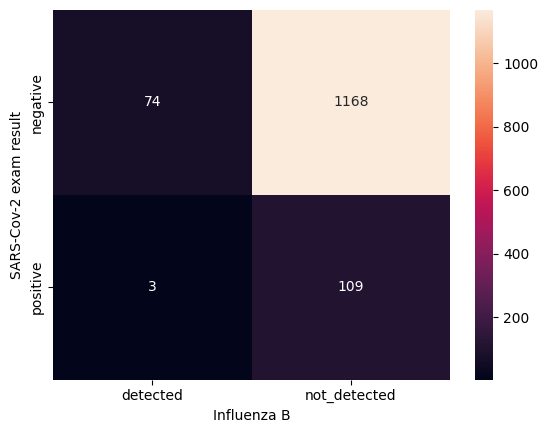

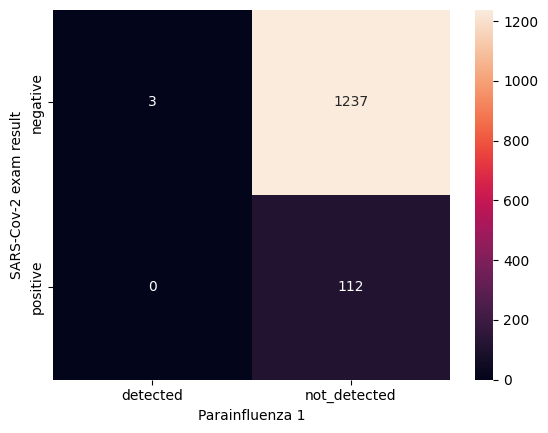

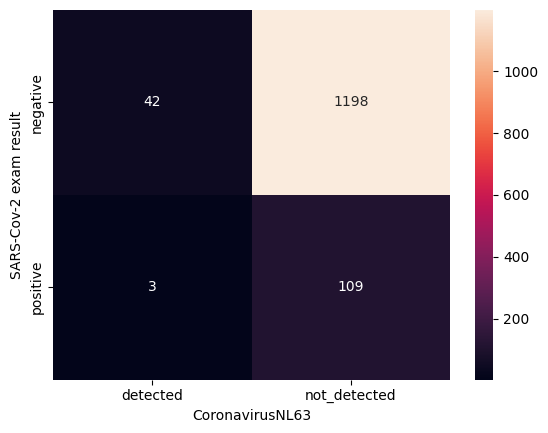

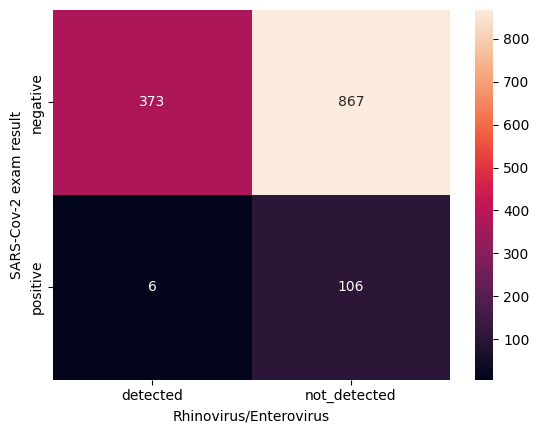

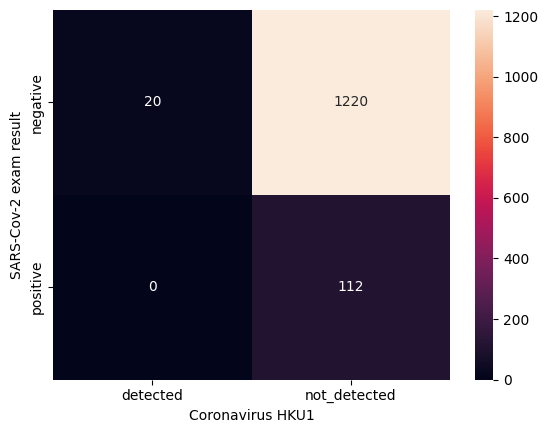

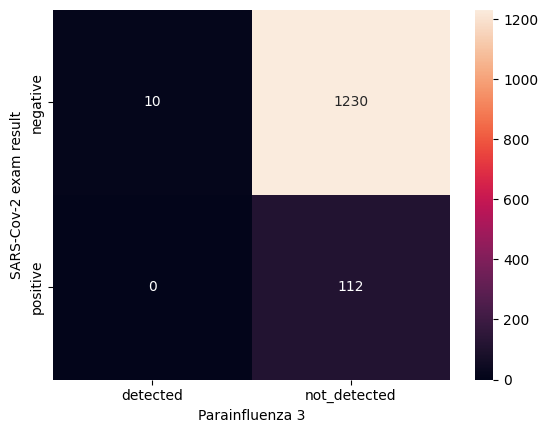

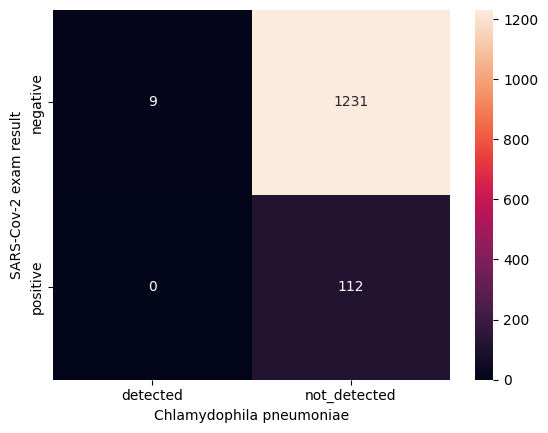

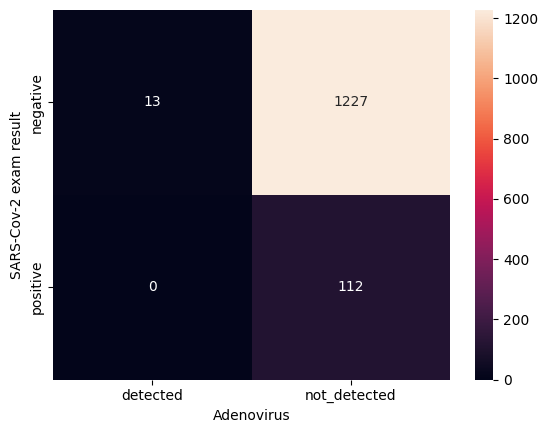

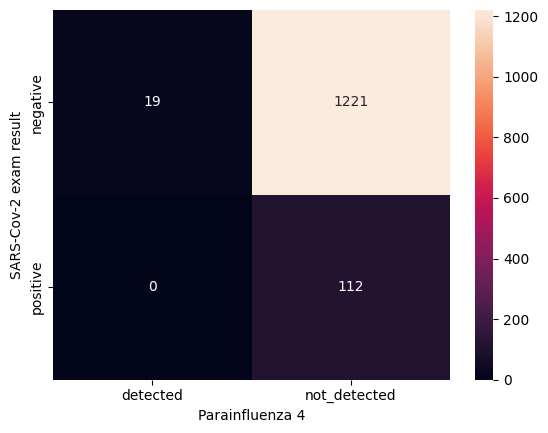

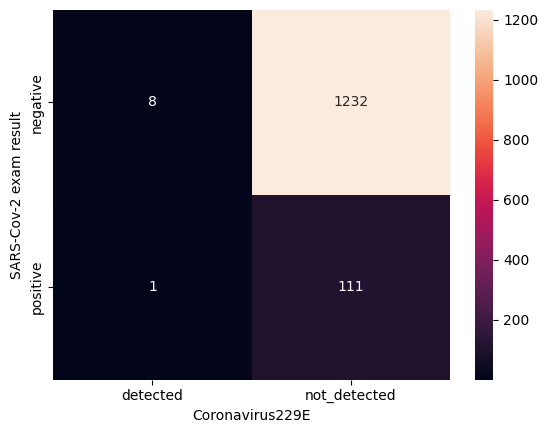

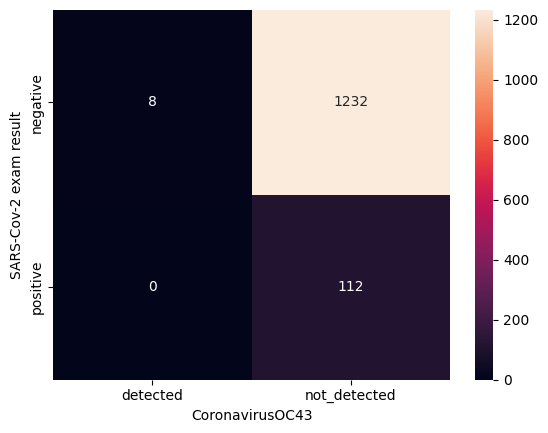

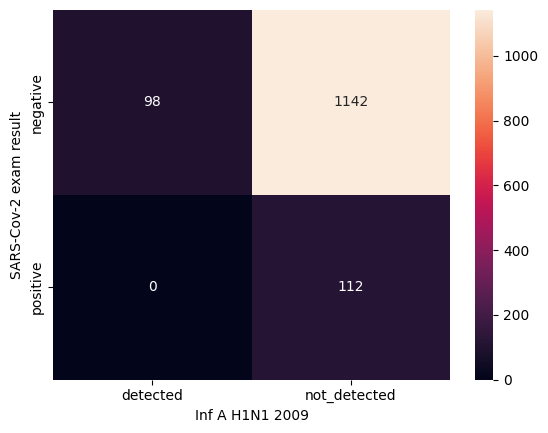

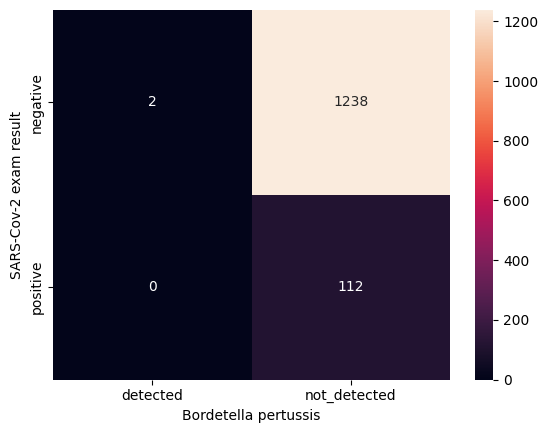

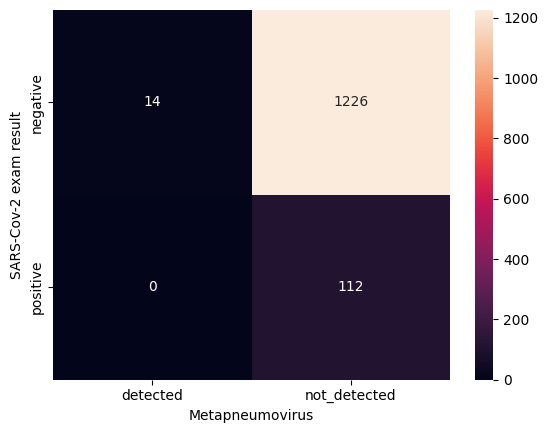

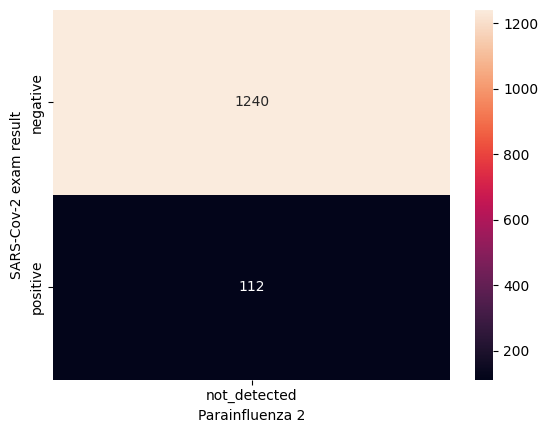

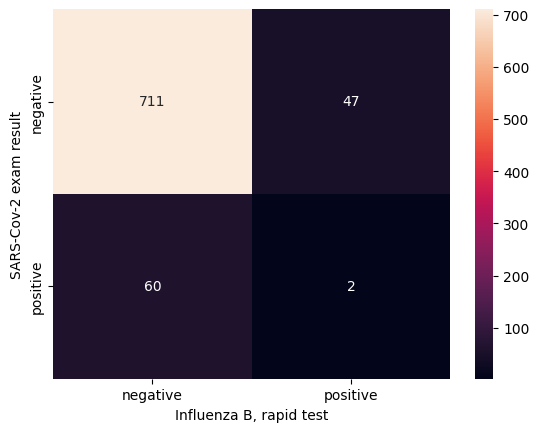

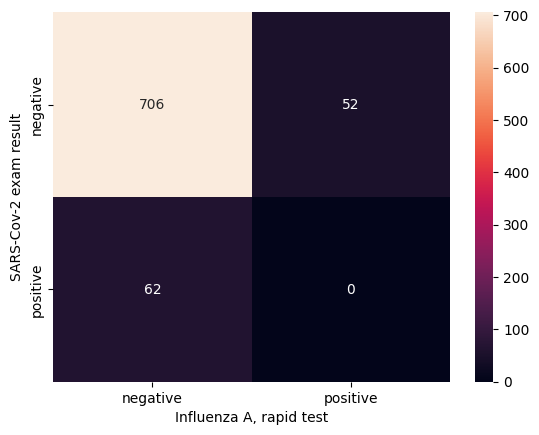

In [35]:
for col in viral_columns:
  plt.figure()
  sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')


Nous constatons que les doubles maladies sont très rares. Si Rhinovirus/Enterovirus positif alors COVID-19 négatif ? Hypothèse à tester ? Pas forcément, il est possible qu'au moment ou ce dataset a été fourni il y avait une épidémie de ce virus dans une région spécifique. De plus, il est possible d'avoir 2 virus en même temps. Donc, il est possible que tout cela n'a pas de lien avec le COVID-19.

### Analyse plus avancée

#### Relations Variable / Variable

Relations taux sanguins (blood_columns / blood_columns)

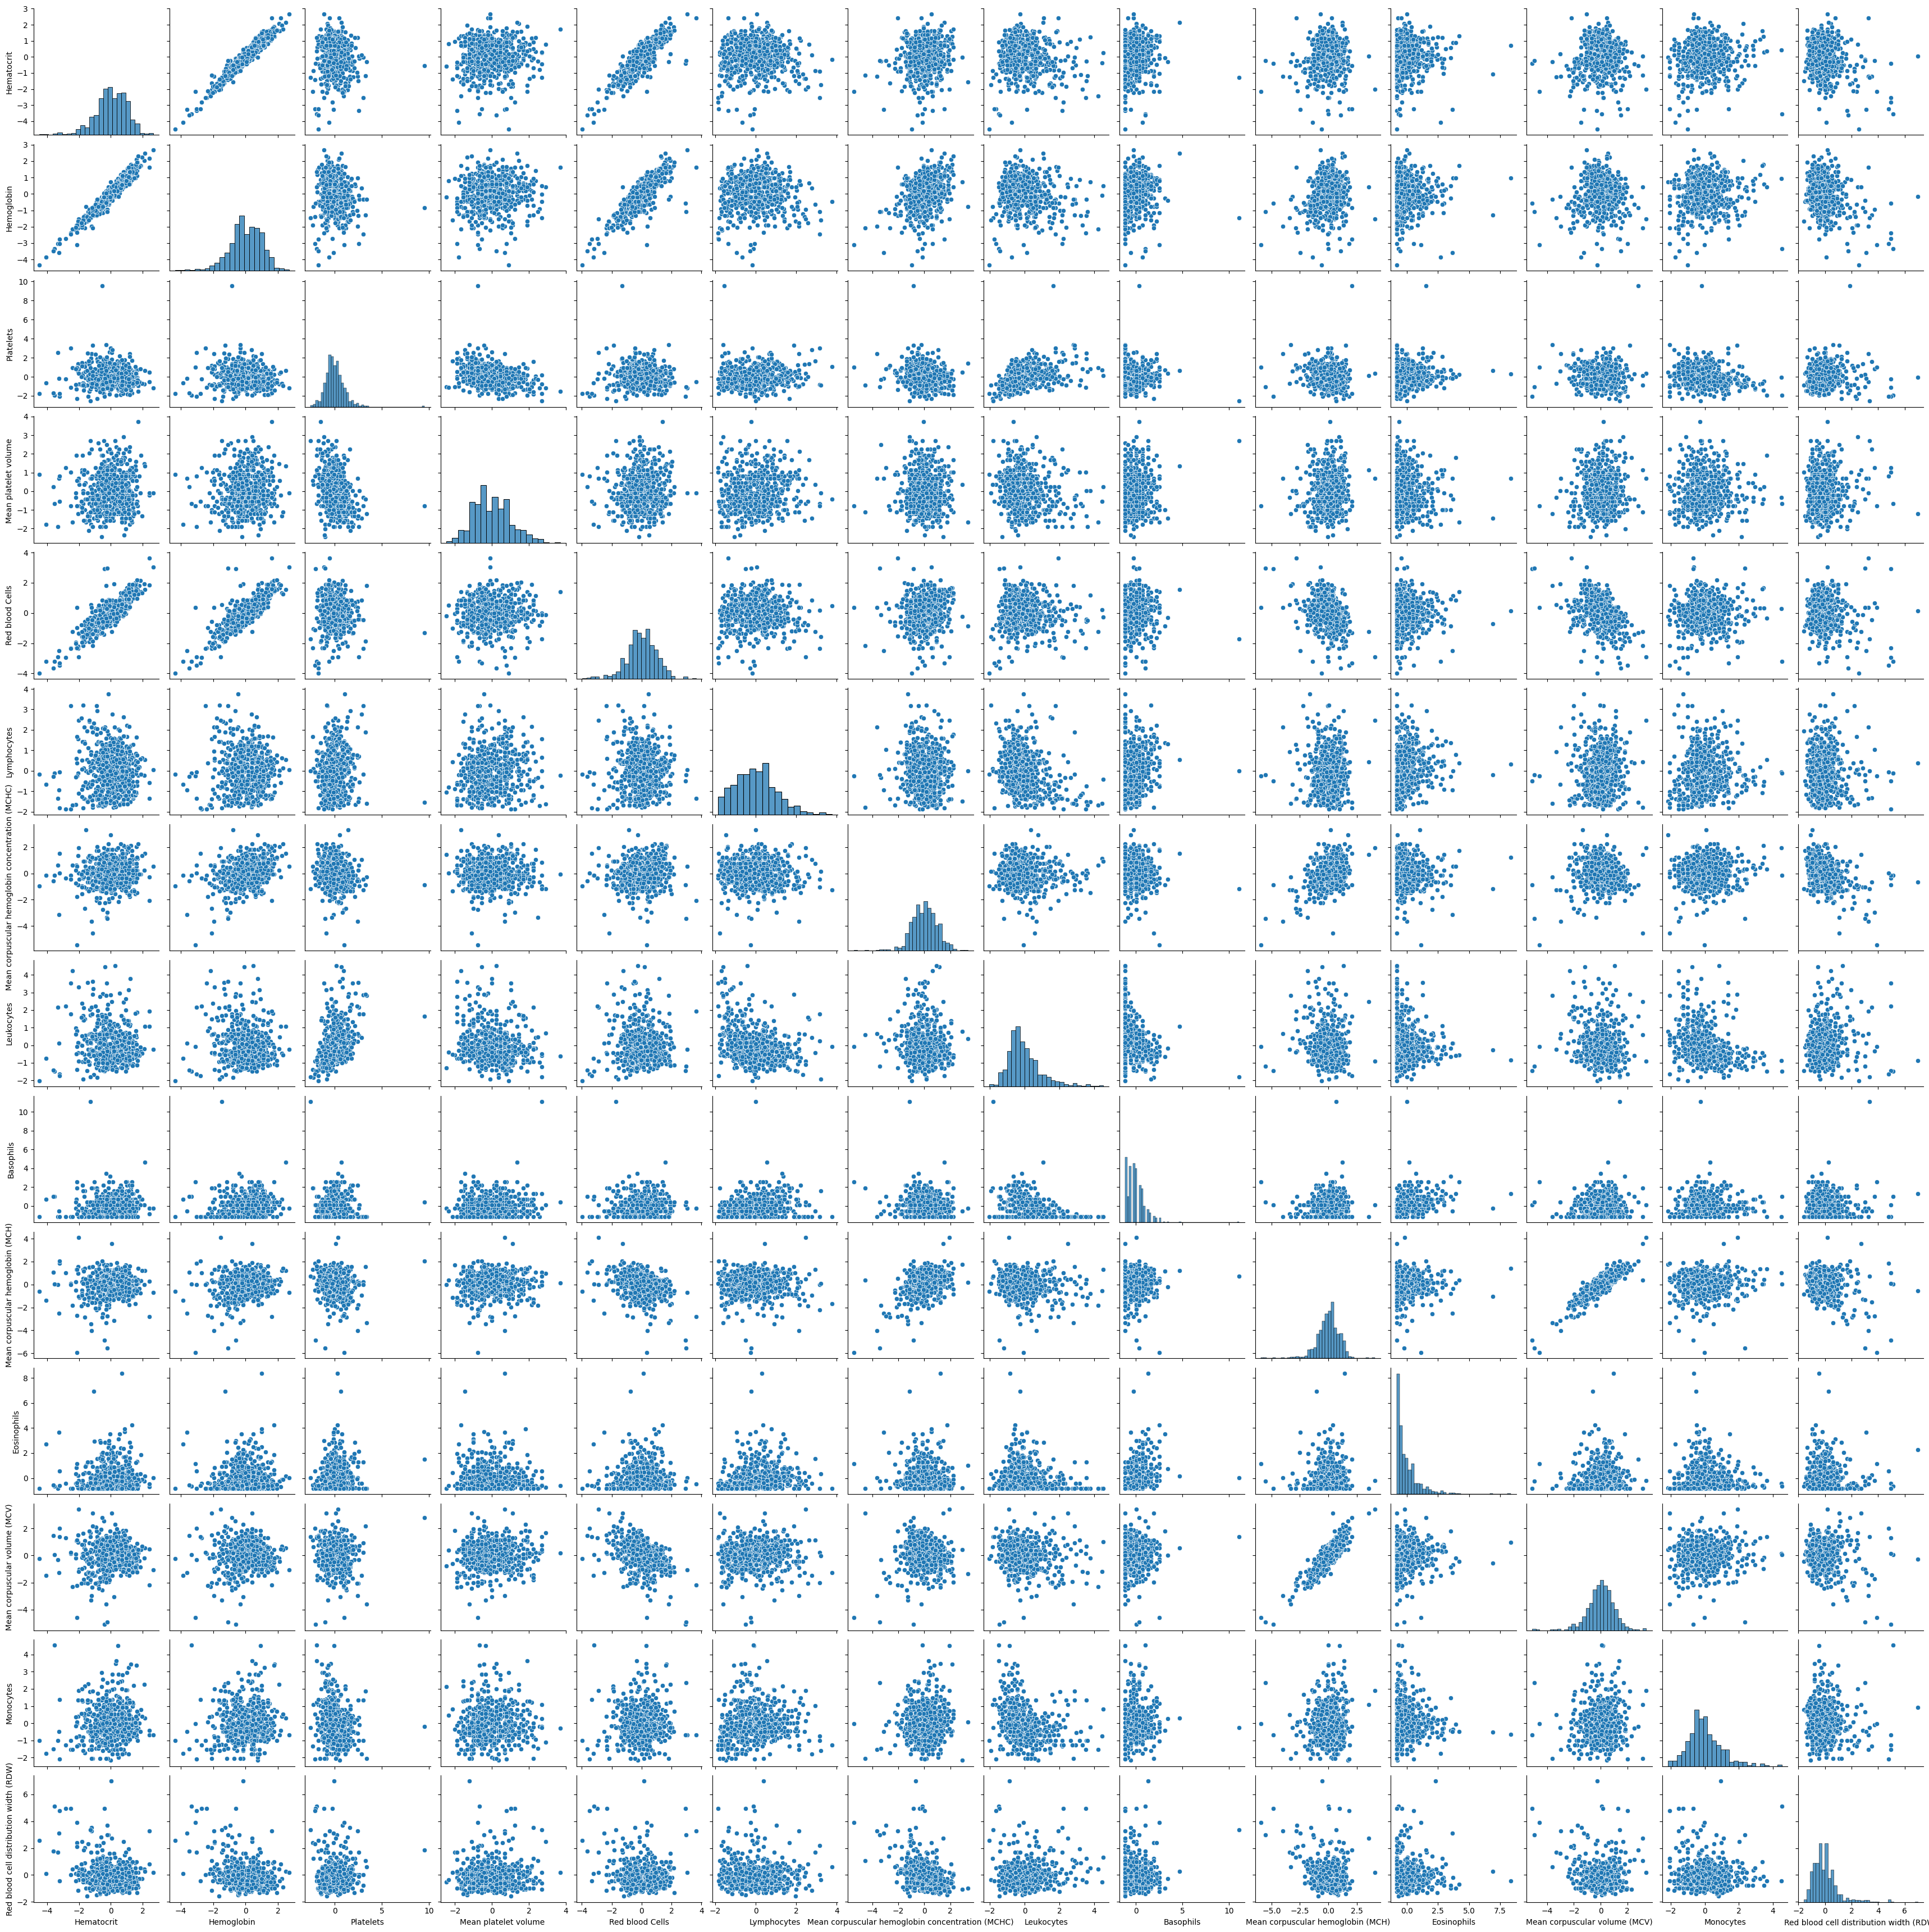

In [36]:
sns.pairplot(df[blood_columns])

Ce graphique est très interessant mais il faudrait beaucoup de temps pour l'analyser visuellement, nous allons donc utiliser une heatmap pour analyser plus vite et mieux.

<Axes: >

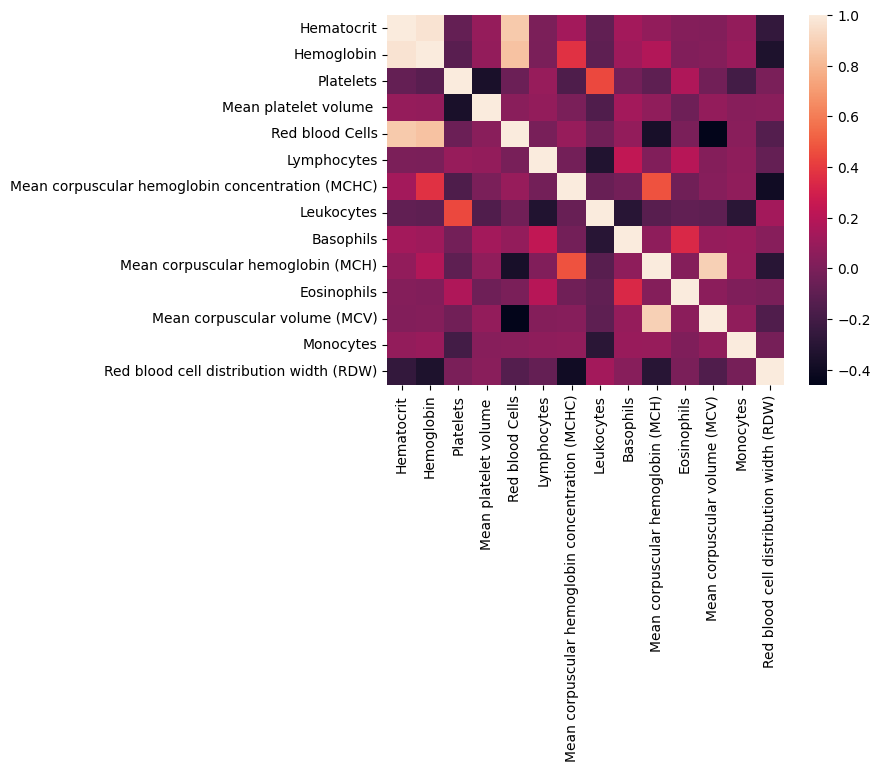

In [37]:
sns.heatmap(df[blood_columns].corr())

Nous avons obtenu exactement meme graphique que plus sauf que maintenant les corrélations sautent au yeux. Plus une corrélation est proche de 1, plus les 2 variables évoluent positivement les unes avec les autres. Pour l'insant, nous ne prenons pas de décision, nous collectons des informations pour prendre des décisions par la suite.
Par exemple, on peut voir qu'il existe une forte corrélation positive entre 'Hematocrit' et 'Hemoglobin'.

Nous allons maintenant utiliser la fonction clustermap de seaborn qui rassemblent directement les variables de manière à créer des clusters.

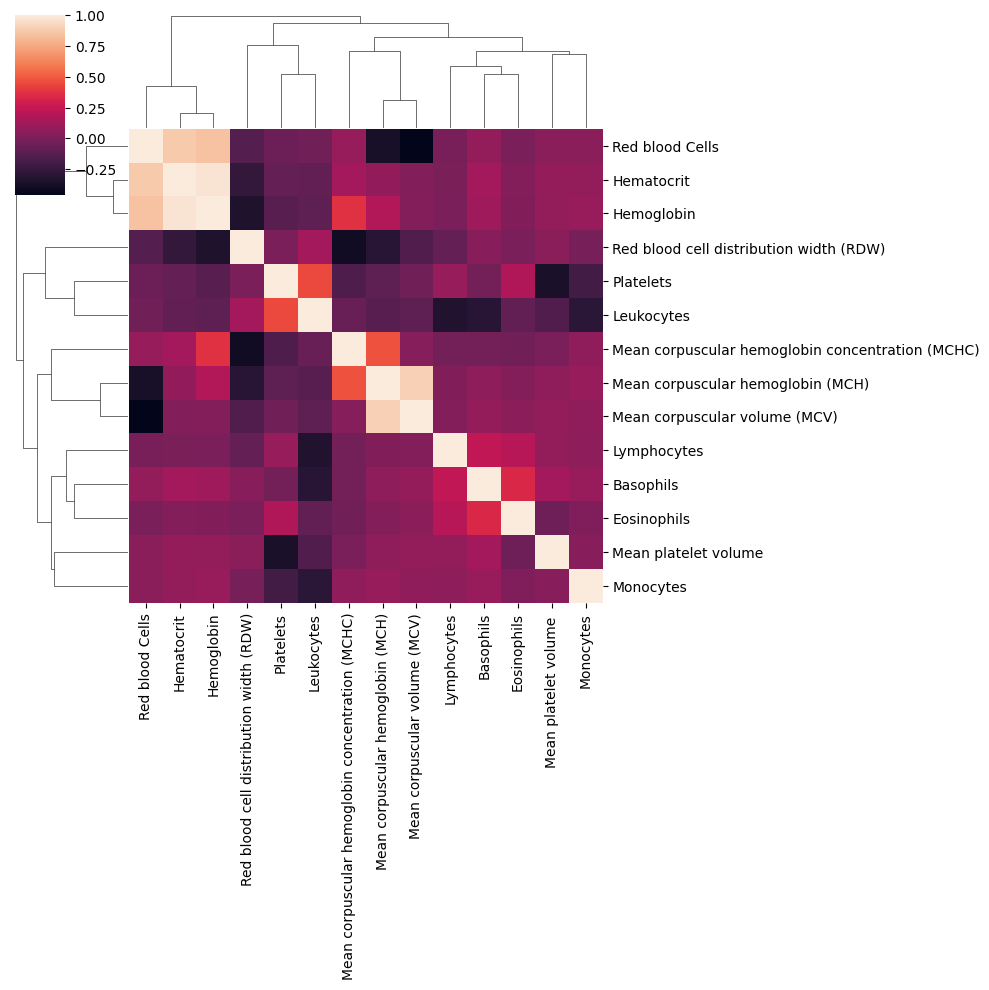

In [38]:
sns.clustermap(df[blood_columns].corr())

Relation Age / Taux sanguins

Nous allons utiliser la fonction de seaborn lmplot qui permet de visualiser des courbes de régression dans les nuages de points.

/tmp/ipython-input-4290735394.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

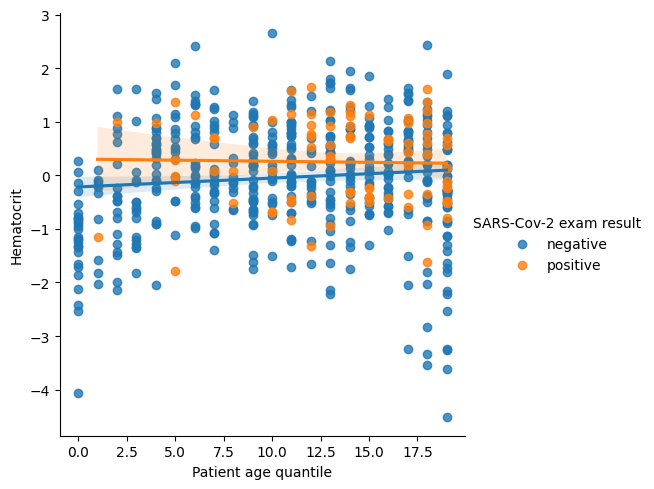

<Figure size 640x480 with 0 Axes>

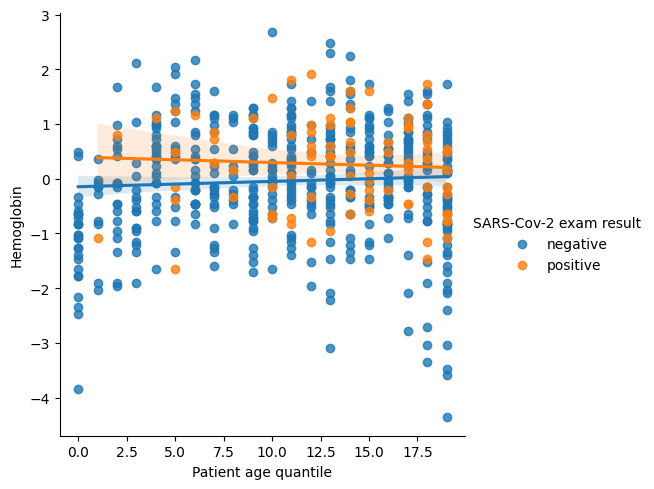

<Figure size 640x480 with 0 Axes>

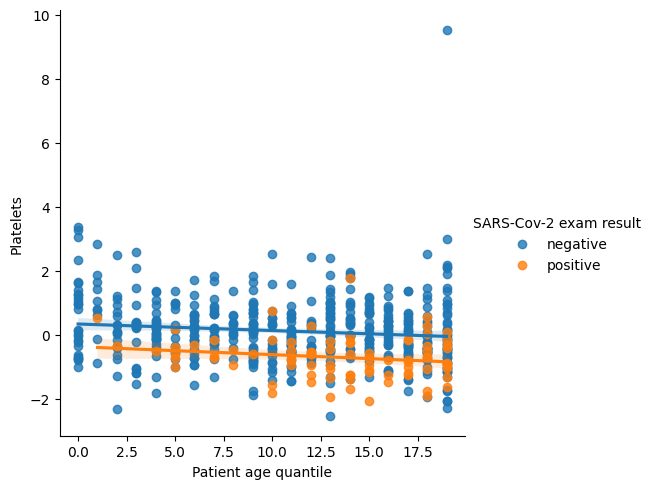

<Figure size 640x480 with 0 Axes>

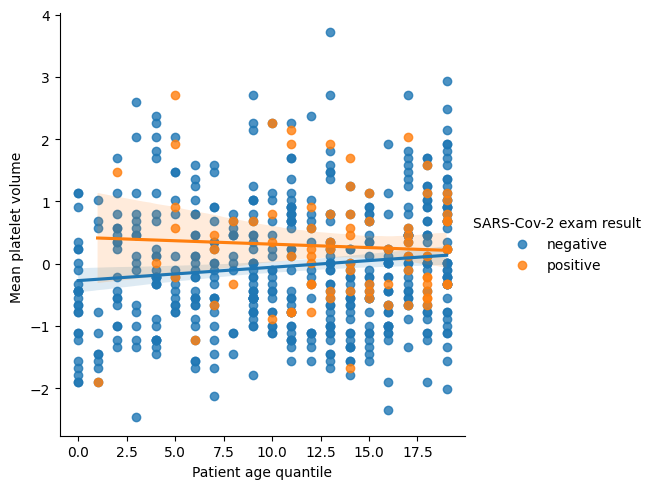

<Figure size 640x480 with 0 Axes>

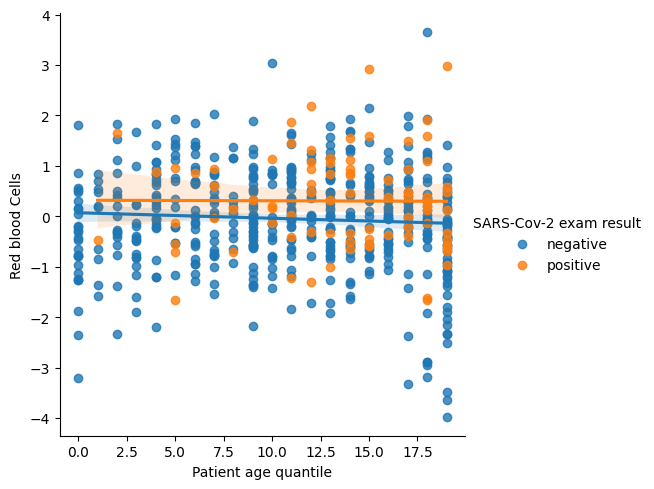

<Figure size 640x480 with 0 Axes>

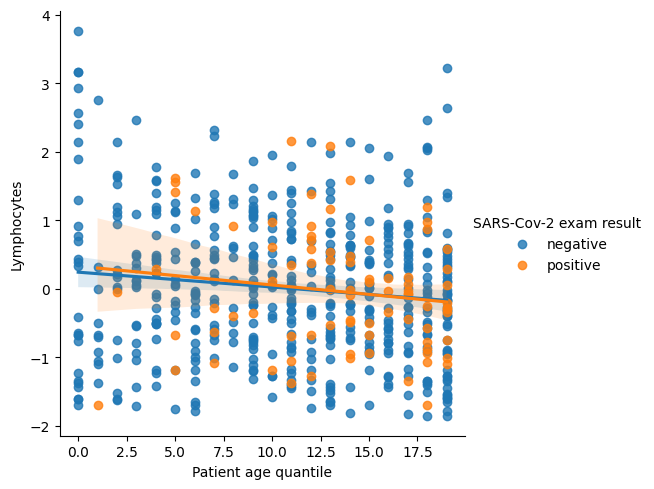

<Figure size 640x480 with 0 Axes>

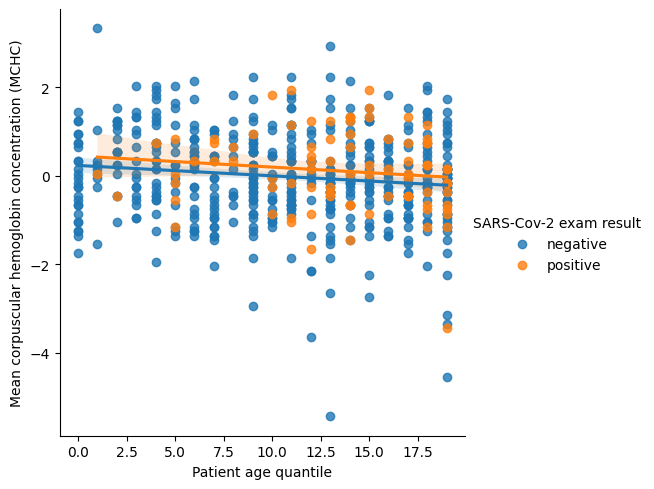

<Figure size 640x480 with 0 Axes>

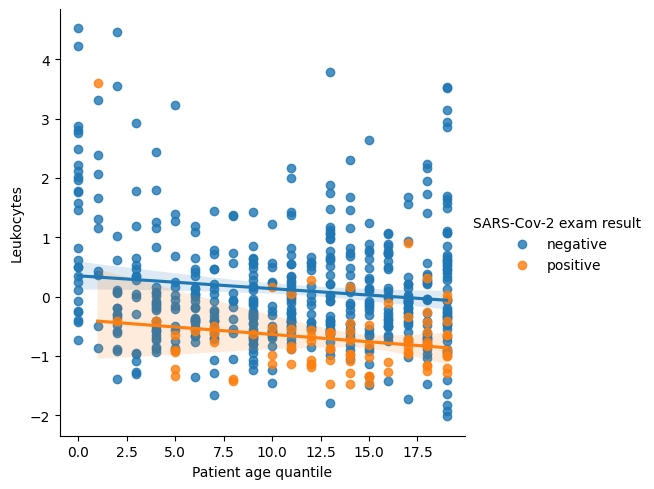

<Figure size 640x480 with 0 Axes>

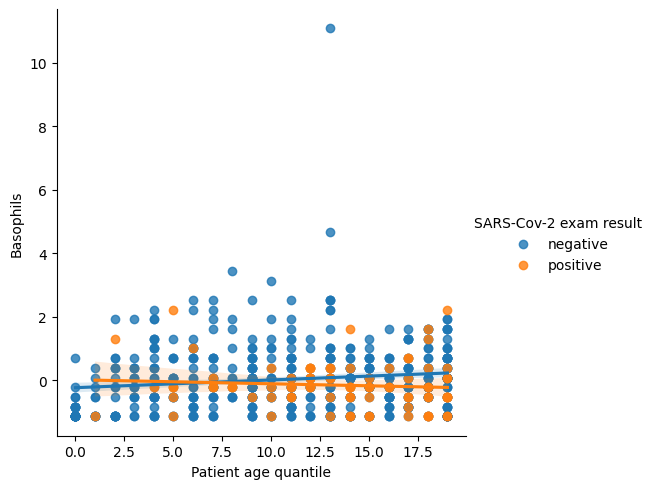

<Figure size 640x480 with 0 Axes>

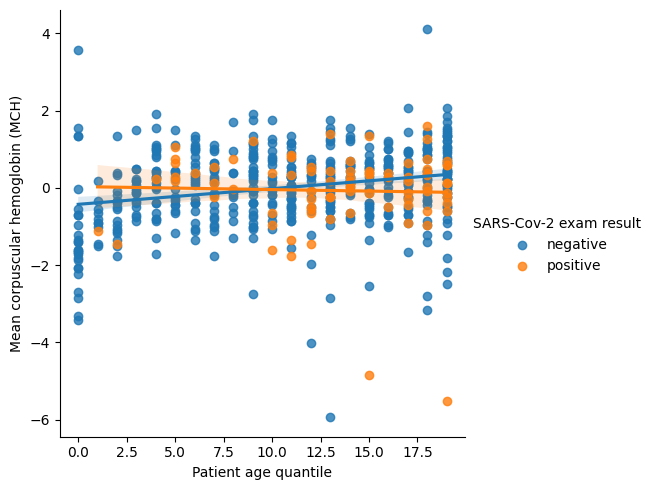

<Figure size 640x480 with 0 Axes>

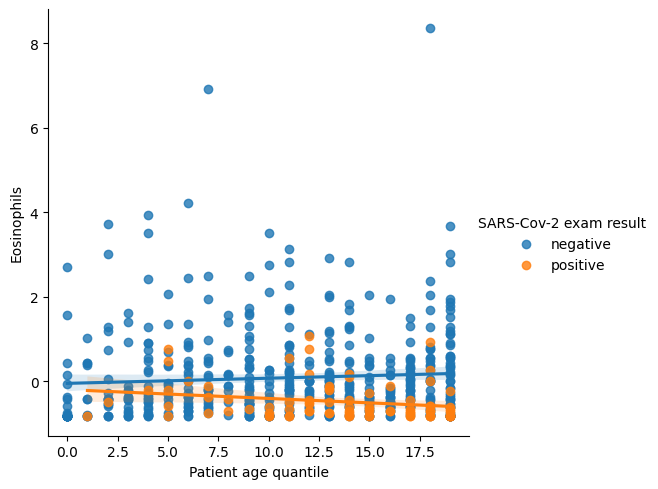

<Figure size 640x480 with 0 Axes>

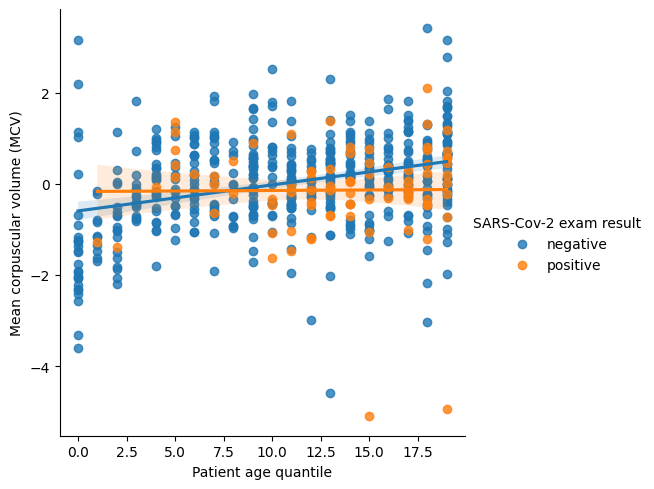

<Figure size 640x480 with 0 Axes>

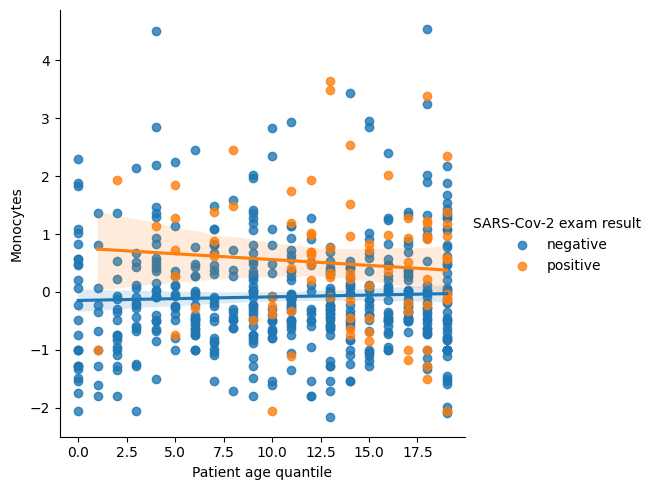

<Figure size 640x480 with 0 Axes>

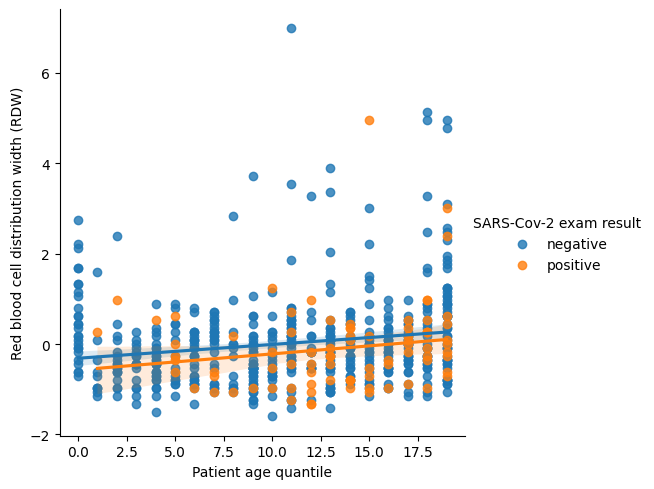

In [39]:
for col in blood_columns:
  plt.figure()
  sns.lmplot(x='Patient age quantile', y=col, hue='SARS-Cov-2 exam result', data=df)

Nous pouvons constater que les droites de régression ne sont pas superposées les unes autres. Il semble qu'il n'y ai pas forcément de relation linéaire entre l'âge et les différents taux sanguins. On dirait qu'il y a une tendance linéaire mais elle semble très faible.

Pour vérifier tout ca nous allons encore utiliser une matrice de corrélation entre l'âge et les différentes variables.

In [40]:
df.corr(numeric_only=True)['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpuscular hemoglobin (MCH)                        0.197394
Mean corpuscular volume (MCV)                            0.281655
Patient age quantile                                     1.000000
Name: Patient age quantile, dtype: float64

Nous pouvons voir que les coefficients de corrélations les plus élevés atteignent à peine 0.28 ou -0.16, ce qui est vraiment très faible.
L'âge n'a donc pas d'influence sur les taux sanguins.

Relations viral / viral (viral_columns / viral_columns)

In [41]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [42]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

Nous remarquons que sur le rapid test 15 cas ont été découverts comme étant positifs alors qu'ils étaient en réalité négatifs au Influenza A. Après une recherche internet sur la sensibilité de ces rapid test, nous nous sommes rendus compte que ces tests sont des tests avec une très mauvaise sensibilité, très peu fiables.

Relations maladie / blood_columns

Tout d'abord, nous allons créer une variable 'est malade' pour indiquer si un patient a été positif à au moins une des maladies, à l'exception du COVID-19.

In [43]:
df['est malade'] = np.sum(df[viral_columns[:-2]] == 'detected', axis=1) >= 1
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

Ensuite, nous allons créer des sous ensembles positifs et négatifs pour nos différentes valeurs de 'est malade'.

In [44]:
malade_df = df[df['est malade'] == True]
non_malade_df = df[df['est malade'] == False]

Puis, nous passons à la visualisation.

/tmp/ipython-input-361567376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(malade_df[col], label = 'malade', kde=True)
/tmp/ipython-input-361567376.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(non_malade_df[col], label = 'non malade', kde=True)
/tmp/ipython-input-361567376.py:3: Use

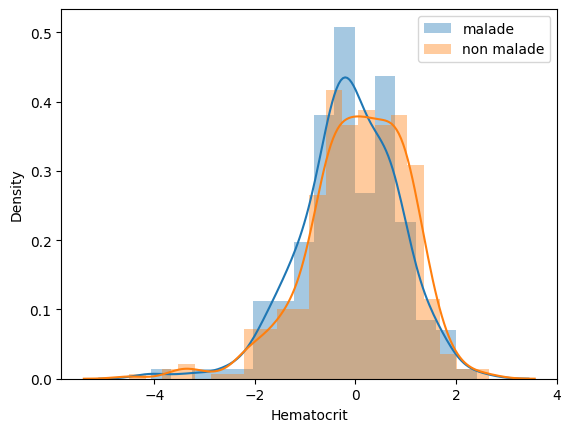

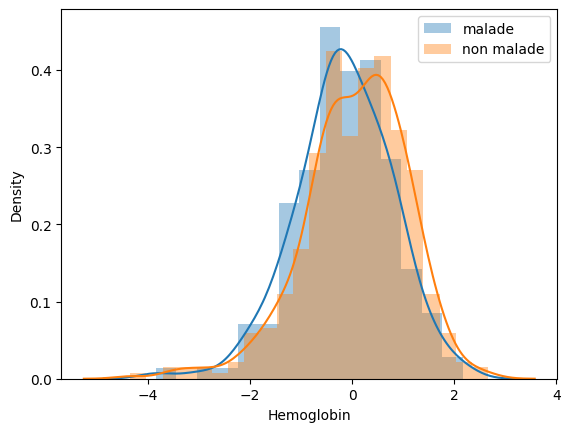

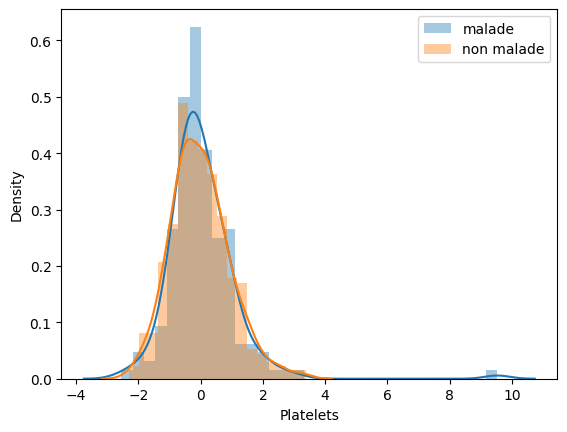

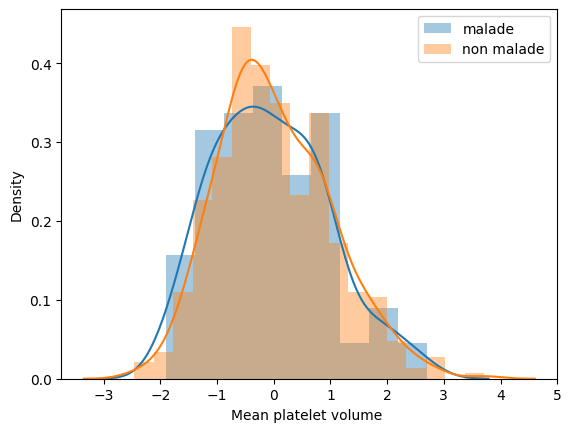

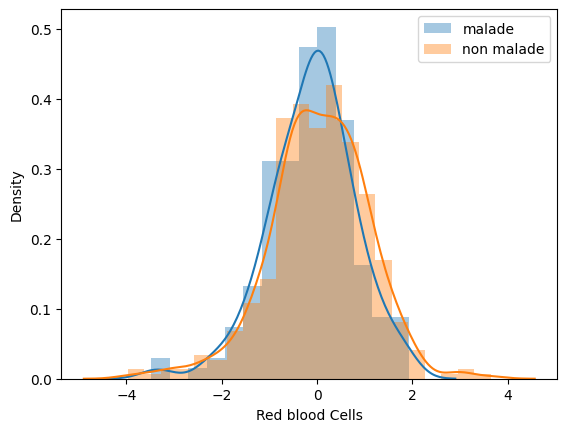

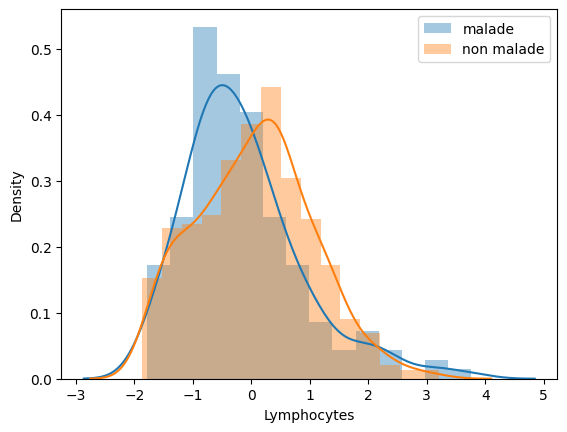

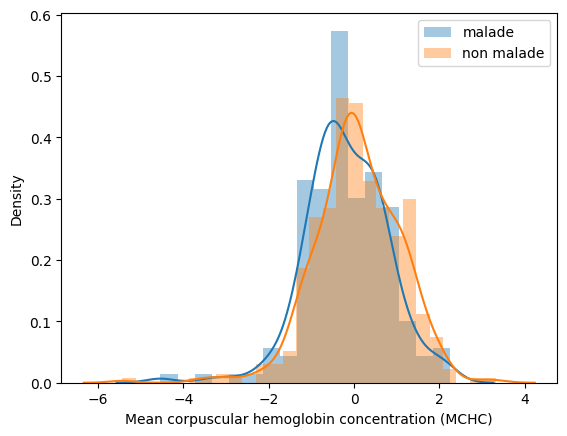

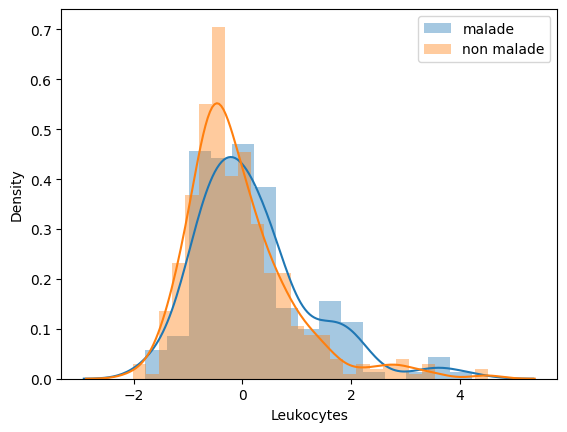

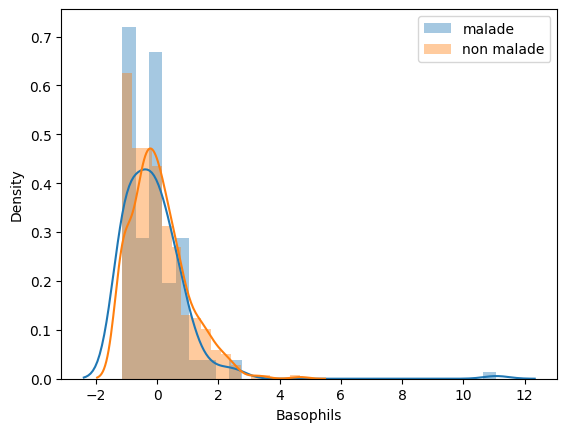

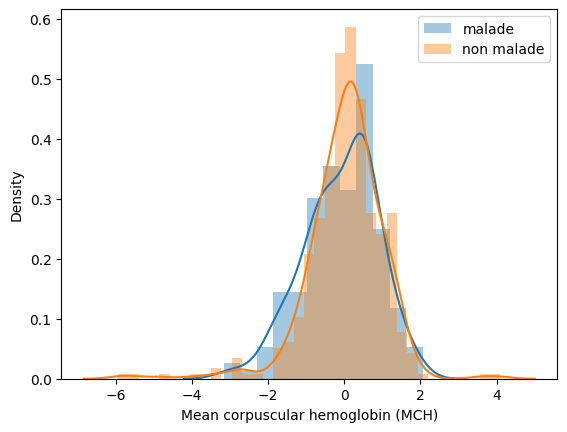

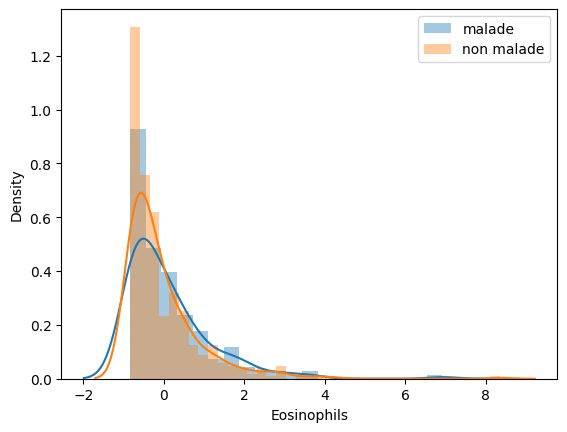

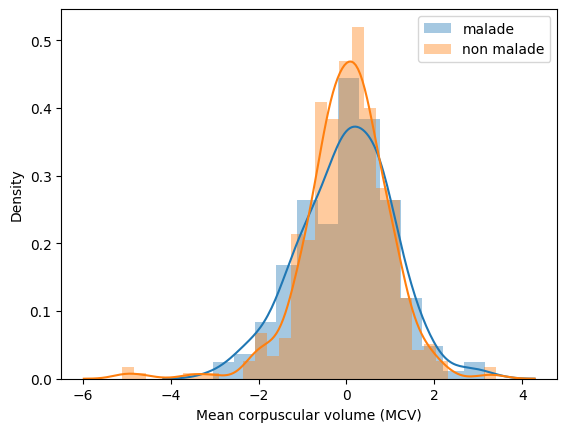

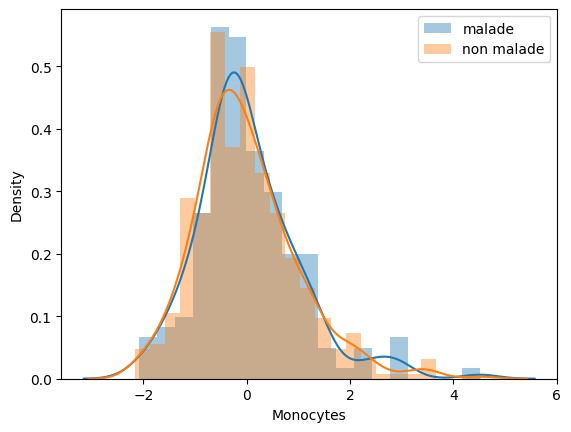

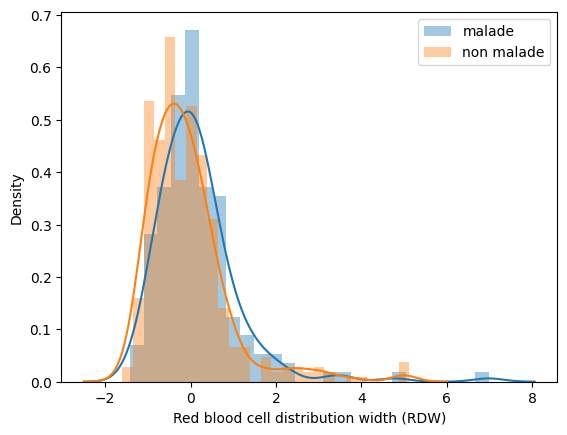

In [45]:
for col in blood_columns:
  plt.figure()
  sns.distplot(malade_df[col], label = 'malade', kde=True)
  sns.distplot(non_malade_df[col], label = 'non malade', kde=True)
  plt.legend()

Nous pouvons observer que les relations maladie / blood_columns sont différents des relations COVID-19 / blood_columns que nous avions eu plus haut.

Relation hospitalisation / blood_columns

Tout d'abord, nous allons créer une variable 'statut' qui va définir le statut de chaque patient: 'surveillance', 'soins semi-intensives', 'soins intensives', 'inconnu'.

In [46]:
def hospitalisation(df):
  if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
    return 'surveillance'
  elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
    return 'soins semi-intensives'
  elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
    return 'soins intensives'
  else:
    return 'inconnu'

In [47]:
df['statut'] = df.apply(hospitalisation, axis=1)
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

Puis, nous passons à la visualisation pour voir si une relation existe.

/tmp/ipython-input-3005796569.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col], label = cat)
/tmp/ipython-input-3005796569.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['statut'] == cat][col], label = cat)
/tmp/ipython-input-3005796569.py:4: UserWarnin

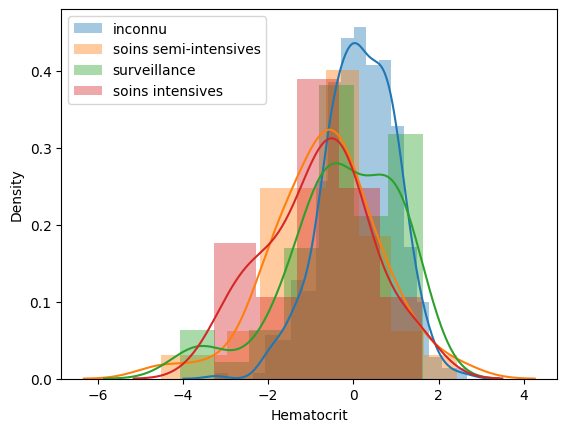

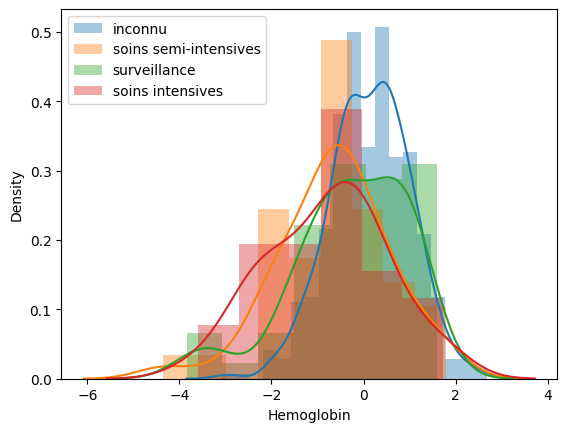

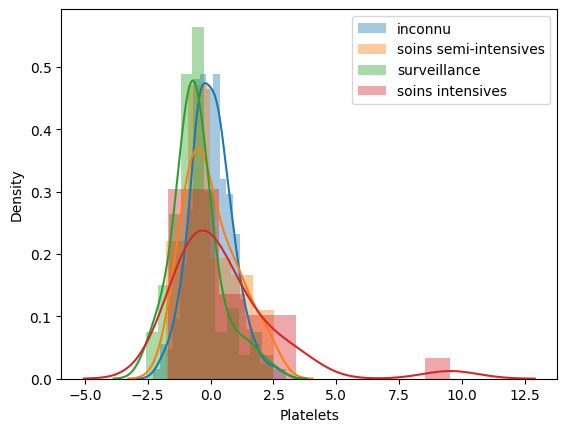

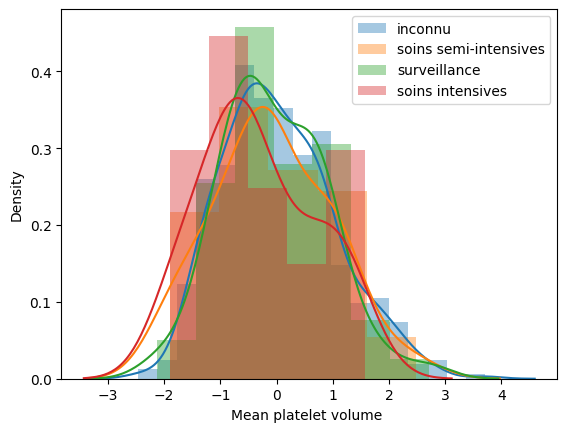

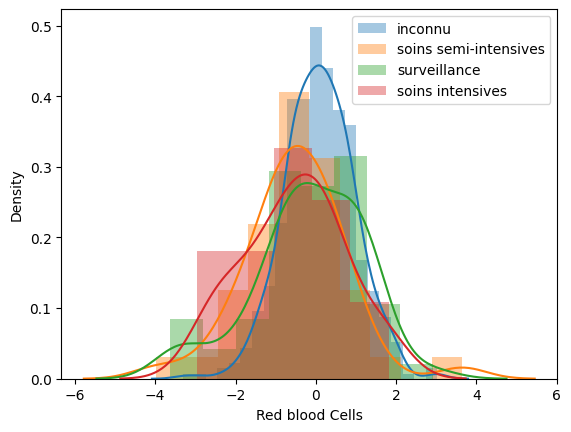

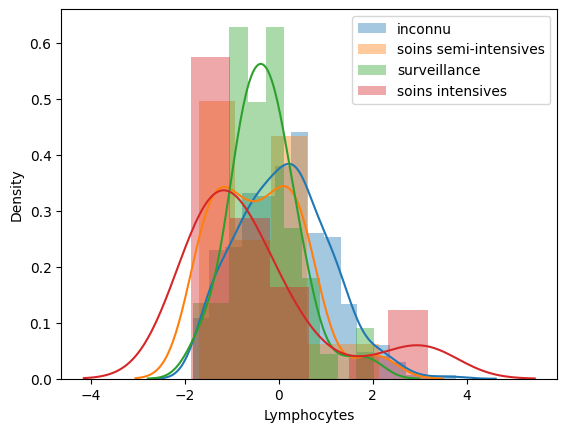

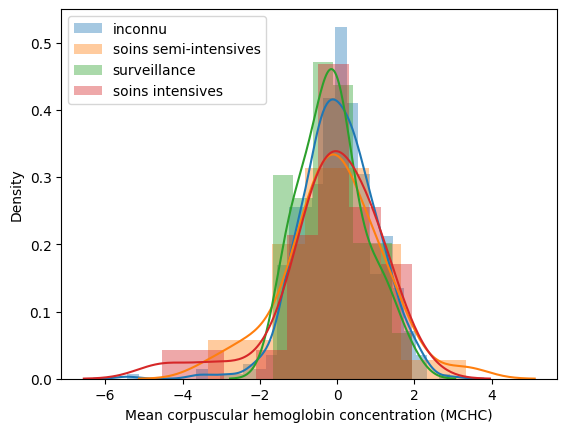

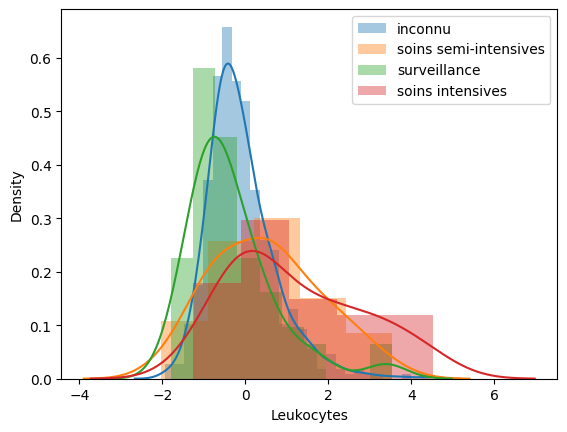

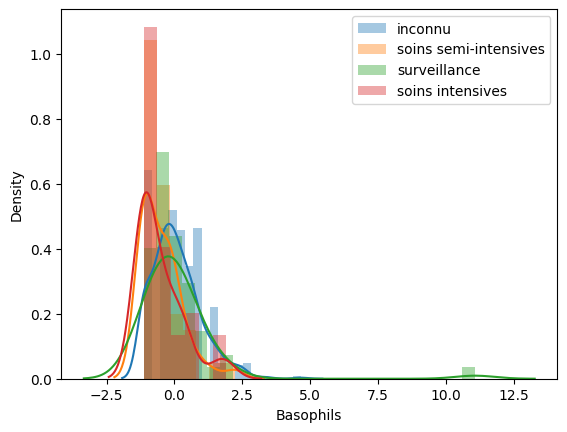

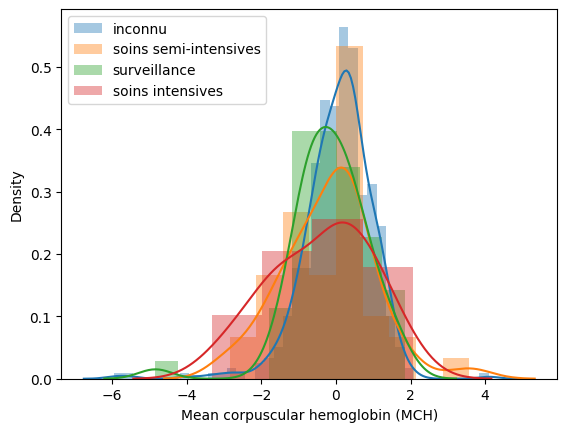

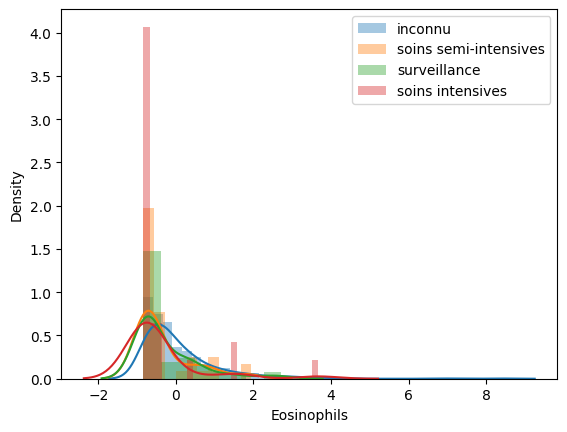

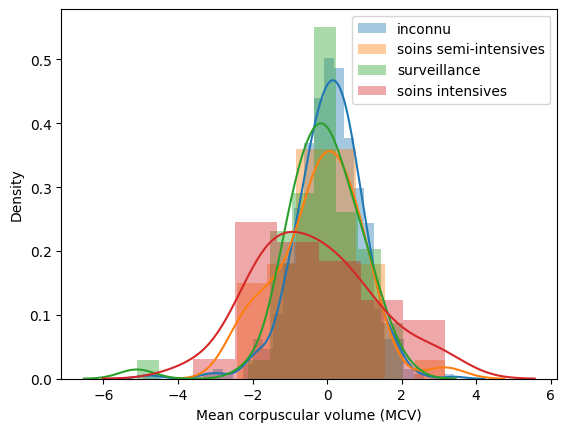

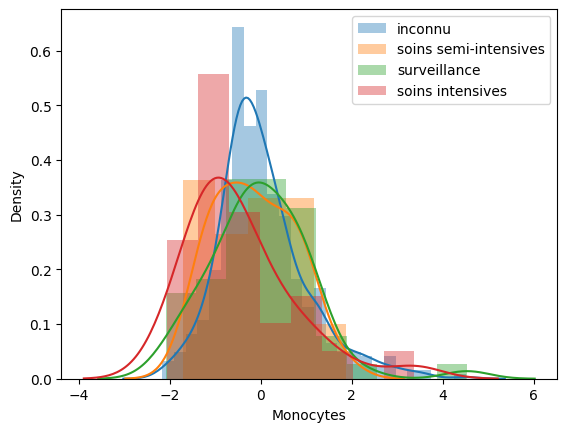

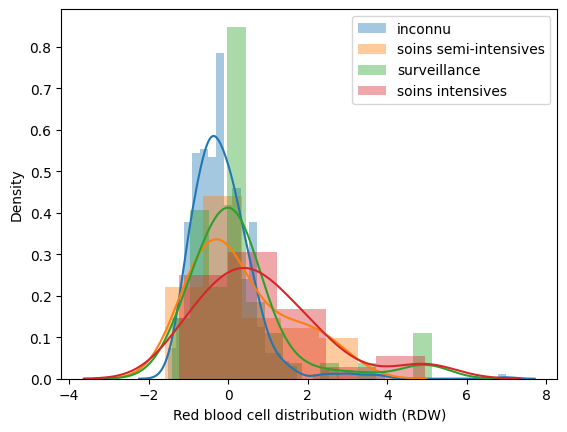

In [48]:
for col in blood_columns:
  plt.figure()
  for cat in df['statut'].unique():
    sns.distplot(df[df['statut'] == cat][col], label = cat)
  plt.legend()

Il est intéressant de constater que par exemple pour 'Leucocytes', les personnes admises en soins intensifs ou semi-intensifs ont des taux de leucocytes vraiment différents. Ce n'est donc pas forcément intéressant pour notre objectif.


#### NaN analyse

Le but est d'essayer de comprendre qu'est-ce qu'il se passerait dans notre dataset si nous éliminions certaines valeurs manquantes.
Actuellement nous avons deux types des variables: blood_columns et viral_columns.

In [49]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

In [50]:
viral_columns

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

Cependant, dans la heatmap que nous avons créé plus haut, les lignes entre ces deux variables ne sont pas allignées. La réunion entre ces deux catégories de variables va dont éliminer énormément de valeurs dans notre dataset et il nous restera trop peu de donées tel qu'on peut le voir:

In [51]:
df.dropna().count()

Patient age quantile                                     99
SARS-Cov-2 exam result                                   99
Patient addmited to regular ward (1=yes, 0=no)           99
Patient addmited to semi-intensive unit (1=yes, 0=no)    99
Patient addmited to intensive care unit (1=yes, 0=no)    99
Hematocrit                                               99
Hemoglobin                                               99
Platelets                                                99
Mean platelet volume                                     99
Red blood Cells                                          99
Lymphocytes                                              99
Mean corpuscular hemoglobin concentration (MCHC)         99
Leukocytes                                               99
Basophils                                                99
Mean corpuscular hemoglobin (MCH)                        99
Eosinophils                                              99
Mean corpuscular volume (MCV)                            99
Monocytes                                                99
Red blood cell distribution width (RDW)                  99
Respiratory Syncytial Virus                              99
Influenza A                                              99
Influenza B                                              99
Parainfluenza 1                                          99
CoronavirusNL63                                          99
Rhinovirus/Enterovirus                                   99
Coronavirus HKU1                                         99
Parainfluenza 3                                          99
Chlamydophila pneumoniae                                 99
Adenovirus                                               99
Parainfluenza 4                                          99
Coronavirus229E                                          99
CoronavirusOC43                                          99
Inf A H1N1 2009                                          99
Bordetella pertussis                                     99
Metapneumovirus                                          99
Parainfluenza 2                                          99
Influenza B, rapid test                                  99
Influenza A, rapid test                                  99
est malade                                               99
statut                                                   99
dtype: int64

Il ne nous reste que 99 valeurs par colonnes...
Donc, si on veut conserver nos NaN il va falloir les combler avec fillna() plus tard dans l'étape du pre-processing.

Nous allons vérifier combien de valeurs il nous resterai si nous travaillons qu'avec une des deux catégories de variables à la fois:

In [52]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [53]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

Il y a plus de valeurs dans viral_columns mais notre analyse a montré que blood_columns semble plus important...

Il faut maintenant essayer de comprendre quel sera l'état de notre target si nous éliminons toutes les valeurs manquantes de certains groupes.

Par exemple, si nous sélectionnons le groupe de viral_columns et qu'on y rajoute la variable target 'SARS-Cov-2 exam result', et qu'on élimine toutes les valeurs manquantes, est-ce que nous garderons toujours un bon rapport de positifs et de négatifs dans notre target ? nous allons le vérifier:

In [54]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

/tmp/ipython-input-3520532109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.91716
positive    0.08284
Name: proportion, dtype: float64

Nous obtenons à peu près les mêmes proportions.

Pour compléter l'analyse, il faut faire la même chose pour le groupe de blood_columns:

In [55]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

/tmp/ipython-input-4103850288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid'] = df['SARS-Cov-2 exam result']


covid
negative    0.864548
positive    0.135452
Name: proportion, dtype: float64

Nous avons obtenu des proportions un peu mieux...

### Test hypothèses nulles (H0)

Pendant notre EDA nous avons eu quelques idées d'hypothèses. Il faut maintenant les vérifier.

« Nous observons que les taux de Platelets, Leukocytes, Monocytes semblent liés au COVID-19 »

Nous allons tester cette hypothèse avec un test de student qui est un test statistique permettant de vérifier si la moyenne entre 2 distributions est significativement différente.
Pour cela il faut émettre une hypothèse H0 dans laquelle:

H0 = les taux moyens sont EGAUX chez les individus positifs et négatifs.

Le but du test de student est donc d'essayer de rejetter cette hypothèse H0.

Nous allons définir un seuil alpha, une valeur p avec le test statistique, et si p < alpha alors nous pouvons rejeter l'hypothèse.

Pour effectuer le test de student nous allons utliser T-Test qui provient de scipy.stats



In [56]:
from scipy.stats import ttest_ind

In [57]:
postive_df.shape

(558, 38)

In [58]:
negative_df.shape

(5086, 38)

Pour ce test il est préférable d'avoir des classes à peu près balancées entre les différents groupes (à peu près le même nombre de cas positifs et négatifs).

Nous allons donc utiliser une technique d'échantillonnage:

In [59]:
balanced_neg = negative_df.sample(postive_df.shape[0])

Nous allons maintenant intégrer postive_df et balanced_neg dans une fonction qui va faire appel à ttest_ind et qui va calculer p entre postive_df et balanced_neg pour chaque colonne de blood_test, et nous allons comparer p à notre seuil alpha.

In [60]:
def t_test(col):
  alpha = 0.02
  stat, p = ttest_ind(balanced_neg[col].dropna(), postive_df[col].dropna())
  if p < alpha:
    return 'H0 reject'
  else :
    return 0

In [61]:
for col in blood_columns:
  print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 reject
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 reject
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 reject
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- 0
Red blood cell distribution width (RDW)----------- 0


H0 est donc rejetée, les taux moyens **NE sont PAS EGAUX** chez les individus positifs et négatifs.

# 3. Pre-processing

In [62]:
dfpp = data.copy()
dfpp.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

## Création des sous-ensembles (suite au EDA)

In [63]:
missing_rate = dfpp.isna().sum()/dfpp.shape[0]
missing_rate

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Eosinophils                                              0.893338
Mean corpuscular volume (MCV)                            0.893338
Monocytes                                                0.893515
Red blood cell distribution width (RDW)                  0.893338
Serum Glucose                                            0.963147
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Influenza B                                              0.760099
Parainfluenza 1                                          0.760454
CoronavirusNL63                                          0.760454
Rhinovirus/Enterovirus                                   0.760454
Mycoplasma pneumoniae                                    1.000000
Coronavirus HKU1                                         0.760454
Parainfluenza 3                                          0.760454
Chlamydophila pneumoniae                                 0.760454
Adenovirus                                               0.760454
Parainfluenza 4                                          0.760454
Coronavirus229E                                          0.760454
CoronavirusOC43                                          0.760454
Inf A H1N1 2009                                          0.760454
Bordetella pertussis                                     0.760454
Metapneumovirus                                          0.760454
Parainfluenza 2                                          0.760454
Neutrophils                                              0.909107
Urea                                                     0.929660
Proteina C reativa mg/dL                                 0.910347
Creatinine                                               0.924876
Potassium                                                0.934266
Sodium                                                   0.934444
Influenza B, rapid test                                  0.854713
Influenza A, rapid test                                  0.854713
Alanine transaminase                                     0.960135
Aspartate transaminase                                   0.959957
Gamma-glutamyltransferase                                0.972892
Total Bilirubin                                          0.967753
Direct Bilirubin                                         0.967753
Indirect Bilirubin                                       0.967753
Alkaline phosphatase                                     0.974486
Ionized calcium                                          0.991141
Strepto A                                                0.941176
Magnesium                                                0.992913
pCO2 (venous blood gas analysis)                         0.975904
Hb saturation (venous blood gas analysis)                0.975904
Base excess (venous blood gas analysis)                  0.975904
pO2 (venous blood gas analysis)         

In [64]:
blood_columns = list(dfpp.columns[(missing_rate < 0.9) & (missing_rate > 0.88)])
viral_columns = list(dfpp.columns[(missing_rate < 0.80) & (missing_rate > 0.75)])

In [65]:
key_columns = ['Patient age quantile', 'SARS-Cov-2 exam result']

In [66]:
#Technique 1, 2, 3, 5:
dfpp = dfpp[key_columns + blood_columns + viral_columns]

#Technique 4:
#dfpp = dfpp[key_columns + blood_columns]

dfpp.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

## Train set - Test set

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
trainset, testset = train_test_split(dfpp, test_size=0.2, random_state=0)

In [69]:
trainset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    4068
positive     447
Name: count, dtype: int64

In [70]:
testset['SARS-Cov-2 exam result'].value_counts()

SARS-Cov-2 exam result
negative    1018
positive     111
Name: count, dtype: int64

## Encodage - Nettoyage

Nous avions 4 grandes catégories dans les viriables qualitatives (type = 'object'): 'negative', 'positive', 'not detected', 'detected'. Nous allons donc les transformer en variables numériques.

Nous allons créer une fonction qui comporte un dictionnaire, un code, que nous appliquerons sur tout le dataset de telle sorte à pouvoir appliquer la fonction aussi bien sur le trainset que sur le testset:

In [71]:
code = {'negative': 0,
        'positive': 1,
        'not_detected': 0,
        'detected': 1}

In [72]:
for col in dfpp.select_dtypes('object'):
  dfpp[col] = dfpp[col].map(code)

In [73]:
dfpp.dtypes.value_counts()

float64    31
int64       2
Name: count, dtype: int64

In [74]:
def encodage(dfpp):
  code = {'negative': 0,
          'positive': 1,
          'not_detected': 0,
          'detected': 1}

  for col in dfpp.select_dtypes('object').columns:
    dfpp.loc[:,col] = dfpp[col].map(code)

  return dfpp

In [75]:
encodage(dfpp)

Patient age quantile  SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                       13                       0         NaN         NaN   
1                       17                       0    0.236515   -0.022340   
2                        8                       0         NaN         NaN   
3                        5                       0         NaN         NaN   
4                       15                       0         NaN         NaN   
...                    ...                     ...         ...         ...   
5639                     3                       1         NaN         NaN   
5640                    17                       0         NaN         NaN   
5641                     4                       0         NaN         NaN   
5642                    10                       0         NaN         NaN   
5643                    19                       1    0.694287    0.541564   

      Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0           NaN                    NaN              NaN          NaN   
1     -0.517413               0.010677         0.102004     0.318366   
2           NaN                    NaN              NaN          NaN   
3           NaN                    NaN              NaN          NaN   
4           NaN                    NaN              NaN          NaN   
...         ...                    ...              ...          ...   
5639        NaN                    NaN              NaN          NaN   
5640        NaN                    NaN              NaN          NaN   
5641        NaN                    NaN              NaN          NaN   
5642        NaN                    NaN              NaN          NaN   
5643  -0.906829              -0.325903         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                                  NaN         NaN        NaN   
1                                            -0.950790   -0.094610  -0.223767   
2                                                  NaN         NaN        NaN   
3                                                  NaN         NaN        NaN   
4                                                  NaN         NaN        NaN   
...                                                ...         ...        ...   
5639                                               NaN         NaN        NaN   
5640                                               NaN         NaN        NaN   
5641                                               NaN         NaN        NaN   
5642                                               NaN         NaN        NaN   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                   NaN          NaN   
1                             -0.292269     1.482158   
2                                   NaN          NaN   
3                                   NaN          NaN   
4                                   NaN          NaN   
...                                 ...          ...   
5639                                NaN          NaN   
5640                                NaN          NaN   
5641                                NaN          NaN   
5642                                NaN          NaN   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                               NaN        NaN   
1                          0.166192   0.357547   
2                               NaN        NaN   
3                               NaN        NaN   
4                               NaN        NaN   
...                             ...        ...   
5639                            NaN        NaN   
5640                            NaN        NaN   
5641                            NaN        NaN   
5642                            NaN        NaN   
5643    

Technique 5 (Feature Engineering): création d'une fonction dans laquelle nous ajoutons la variable 'est malade'.

In [76]:
#Technique 5:
def feature_engineering(dfpp):
  dfpp['est malade'] = dfpp[viral_columns].sum(axis=1) >= 1
  dfpp = dfpp.drop(viral_columns, axis=1)
  return dfpp

Maintenant nous allons créer une fonction qui permettra de supprimer les valeurs manquantes:

In [77]:
#Technique 1, 4, 5:
def imputation(dfpp):
  return dfpp.dropna(axis=0)

In [78]:
#Technique 2:
#def imputation(dfpp):
#  return dfpp.fillna(-999)

In [79]:
#Technique 3:
#def imputation(dfpp):
#  dfpp['is na'] = (dfpp['Parainfluenza 3'].isna()) | (dfpp['Leukocytes'].isna())
#  dfpp = dfpp.fillna(-999)
#  return dfpp

Et enfin, nous allons créer une fonction de pre-processing qui lie les deux fonctions:

In [80]:
def preprocessing(dfpp):
  dfpp = encodage(dfpp)

  #Technique 5:
  dfpp = feature_engineering(dfpp)

  dfpp = imputation(dfpp)

  X = dfpp.drop('SARS-Cov-2 exam result', axis=1)
  y = dfpp['SARS-Cov-2 exam result'].astype(int)

  print(y.value_counts())

  return X, y

In [81]:
X_train, y_train = preprocessing(trainset)

SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


In [82]:
X_test, y_test = preprocessing(testset)

SARS-Cov-2 exam result
0    95
1    16
Name: count, dtype: int64


Vérification que l'encodage a bien fonctionné pour éviter de potentielles erreurs:

In [83]:
print("y_train dtype:", y_train.dtype)
print("y_train uniques:", sorted(y_train.unique()))
print("any NaN in y_train:", y_train.isna().any())
print("X_train dtypes:", X_train.dtypes.value_counts())


y_train dtype: int64
y_train uniques: [np.int64(0), np.int64(1)]
any NaN in y_train: False
X_train dtypes: float64    14
int64       1
bool        1
Name: count, dtype: int64


In [84]:
print(y_train.dtype)
print(y_train.unique()[:30])
print(y_train.value_counts(dropna=False))


int64
[0 1]
SARS-Cov-2 exam result
0    422
1     65
Name: count, dtype: int64


## Modélisation (ML)

Nous allons maintenant créer un premier modèle de ML: arbre de décision (DecisionTreeClassifier). Ce modèle est simple et rapide donc il va nous permettre de rapidement diagnostiquer le modèle par la suite.

In [85]:
from sklearn.tree import DecisionTreeClassifier

#A partir de Technique 5:
from sklearn.ensemble import RandomForestClassifier

#A partir de Technique 6:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

#A partir de Technique 8:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
#Technique 1 à 4:
#model = DecisionTreeClassifier(random_state=0)

#Technique 5:
#model = RandomForestClassifier(random_state=0)

#Technique 6:
#model = make_pipeline(SelectKBest(f_classif, k=10), RandomForestClassifier(random_state=0))

#Technique 7:
#model = make_pipeline(SelectKBest(f_classif, k=5), RandomForestClassifier(random_state=0))

#Technique 8:
model = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10), RandomForestClassifier(random_state=0))

Nous avons fixé random_state=0 car c'est très important pour avoir une répétabilité dans nos résultats et ainsi évaluer de la même manière les différentes idées que nous mettrons en oeuvre.

## Evaluation du modèle

Nous allons créer une procédure d'évaluation. Nous utiliserons la métrique F1 car elle permet d'avoir un bon aperçu sur le rapport entre la précision et la sensibilité (recall). Précision et Recall permettent de mesurer les proportions de FP et FN que notre modèle effectue.

In [87]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

L'outil 'classification_report' permet de faire un bilan de différentes métriques.

L'outil 'learning_curve' permet de vérifier si notre modèle est en over-fitting, ou en under-fitting. Il nous aidera à prendre des décisions pour améliorer notre modèle (Feature Selection, Feature Engineering, Feature Scaling).

In [88]:
def evaluation(model):

  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))


Nous avons entrainé le modèle et vérifier les résultats:

In [89]:
evaluation(model)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



Sur 54 cas dans notre testset, nous avons obtenu 52 TN (bien détecté que les patients sont négatifs au COVID), 2 FP, 10 FN, 2 TP.

Donc parmi les 12 patients positifs au COVID, nous avons réussi à en identifier seulement 2, soit un recall de 17%, **ce qui n'est pas très bon...**

## Diagnostic

Technique 1: Tout le principe est que ce n'etait qu'un premier modèle, le but maintenant est de l'améliorer.
Nous allons donc utiliser des learning curve pour comprendre si notre modèle est en over-fitting ou en under-fitting.

In [90]:
def evaluation(model):

  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10), scoring='f1')

  plt.figure(figsize=(12, 8))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='evaluation score')
  plt.legend()

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/pyt

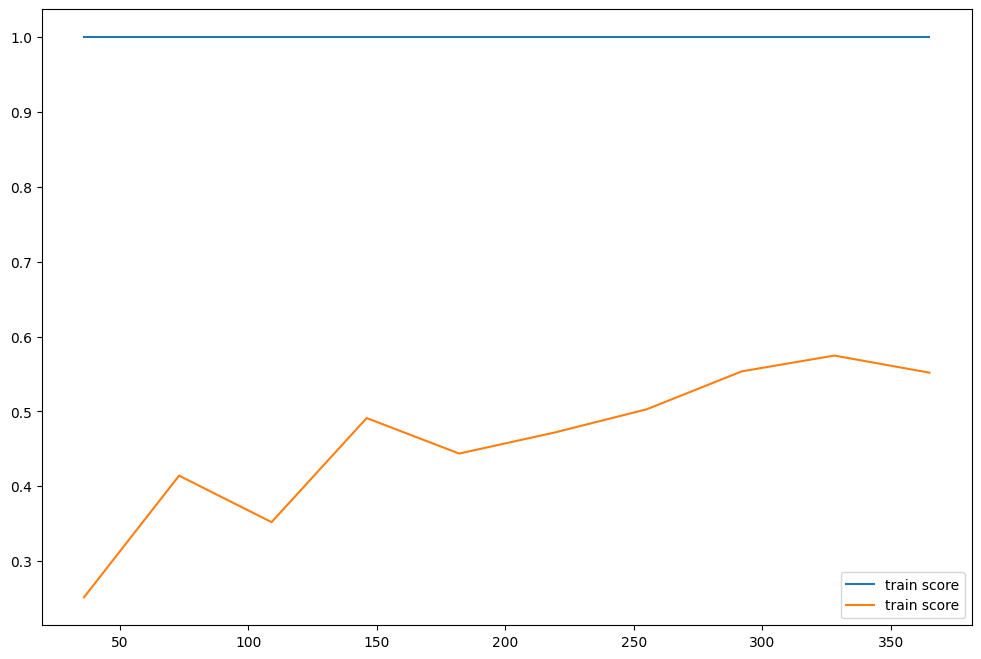

In [91]:
evaluation(model)

Technique 1: Notre modèle est en over-fitting car nous pouvons voir un score de 100% sur le trainset, par contre il est inccapable de performer sur le testset.
Il y a un trop grand écart entre la courbe de F1 du trainset et du testset ce qui montre que nous sommes en over-fitting.


## Amélioration du modèle

Nous devons donc améliorer notre modèle pour lutter contre cet over-fitting.

Toutes les améliorations ont été faites sur le code plus haut, ici nous décrivons simplement ce qui a été fait et les résultats obtenus (évaluation + diagnostic).

Nous allons commencer par essayer de fournir plus de données à la machine car d'après le graph, on dirait que plus il y a de données plus la courbe du trainset augmente.

Technique 2: Nous avons tenté de modifier la fonction 'imputation' de telle sorte à remplacer les valeurs manquantes par -999 grâce à filna(-999).
**--> Résultats encore pire...**

Technique 3: Nous allons donc tenter de laisser fillna() en rajoutant un missing indicator qui nous signalera la présence de NaN.
**--> Cela n'a toujours pas fonctionné...**

Technique 4: A présent nous allons tenter la technique de Feature Variable.
Tout d'abord nous réutilisons la fonction imputation() de la technique 1, nous recréons le trainset et le testset et nous réentraînons le modèle. A partir de là, nous allons utiliser l'attribut feature_importances_ qui nous dévoile quelles sont les variables les plus importantes dans la découpe de l'arbre de décision.
--> Nous n'avons pas utiliser les viral_columns et relancer le modèle de ML, **cela n'a toujours pas fonctionné**, nous sommes toujours en over-fitting.

Technique 5: Nous allons tester un nouveau modèle de ML qui lutte contre le over-fitting: Random Forest. De plus, nous allons faire du Feature Engineering en créant une fonction feature_engineering() dans laquelle nous ajoutons la variable 'est malade' tel que nous l'avions fait dans l'EDA (voir feature_importance_) et dans laquelle nous supprimons les viral_columns à l'exception de 'est malade'.
**--> Cela n'a toujours pas fonctionné**, le modèle est toujours en over-fitting. Par contre, la courbe du trainset est ascendante ce qui est un bon signe.

Technique 6: Feature Selection avec l'utilisation d'un selector, test statistique d'ANOVA. Pour se faire, nous allons créer une pipeline dans la partie modélisation pour faire le SelectKBest en étant cohérant entre le trainset et le testset. Le SelectKBest permet de sélectionner les variables ayant les plus forts liens possibles avec notre target, nous allons utiliser k=10 pour obtenir les 10 variables ayant les liens les plus forts avec notre target.
--> Nous commençons à voir des progrès mais **ce n'est pas encore ça**.

Technique 7: Même chose que technique 6 sauf que nous allons définir k=5.
--> **Nous commençons à obtenir de bons résultats**. Nous sommes partis d'un dataset qui comportait 111 variables, seulement 5 ont une réelle influence pour prédire la target.

Technique 8: PolynomialFeature, expansion polynomiale avec le transformer de sklearn, suivis d'un SelectKBest, k = 10. PolynomialFeature (2) permet d'élever chaque variable au carré et de multiplier chaque variable à ses différentes voisines.
--> **Nous sommes vraiment sur la bonne piste**. En intégrant tout ça dans le pre-processing et en optimisant tout cela par la suite, nous arriverons à de bons résultats.

In [92]:
#Technique 4, 5 (suite):
#pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()

Technique 4 (suite): nous pouvons observer que pour notre modèle, les blood_columns sont bien plus importantes que les viral_columns. Notre EDA l'avait déja révélé... Nous retournons donc là où nous avions créé nos sous-ensembles et nous allons désélectionner les viral_columns.
_voir le paragraphe des améliorations pour la conclusion de cette technique._

Technique 5 (suite): le graph montre encore une fois que les blood_columns sont plus importantes. De plus, pendant l'EDA nous avions défini une variable 'est malade' pour voir si un patient atteint du COVID aurait été testé positif à une autre maladie. Nous avions obtenu que le taux de lymphocytes était différent par exemple. Nous allons donc rajouter cette variable. En rajoutant la variable, et en relançant le modèle, nous constatons qu'il y a encore beaucoup de variables qui ne jouent pas un rôle important dans notre modèle... _voir le paragraphe des améliorations pour la conclusion de cette technique._

# 4. Modeling

## Fonction d'évaluation

In [108]:
def evaluation1(model):

  model.fit(X_train, y_train)
  ypred = model.predict(X_test)

  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))

  N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1, 1, 10), scoring='f1')

  plt.figure(figsize=(12, 8))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()

## Entraînement de différents modèles

4 modèles: RandomForestClassifier, AdaBoostClassifier, SVC, KNeighborsClassifier.

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [110]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [111]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

Attention: pour SVM et KNN il faut rajouter un StandardScaller(), une normalisation, les modèles vus jusqu'à maintenant étaient des modèles basés sur les arbres de décisions qui n'ont pas besoin de normalisation. Cependant SVM, KNN et la majorité des autres modèles ont besoin d'être normalisés.

Au départ, tous les modèles sont sur leurs paramètres de base, le but étant de les optimiser par la suite.

In [112]:
dict_of_models = {'RandomForest' : RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN' : KNN
                  }

RandomForest
[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111

AdaBoost
[[89  6]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.50      0.38      0.43        16

    accuracy                           0.86       111
   macro avg       0.70      0.66      0.67       111
weighted avg       0.84      0.86      0.85       111

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71  

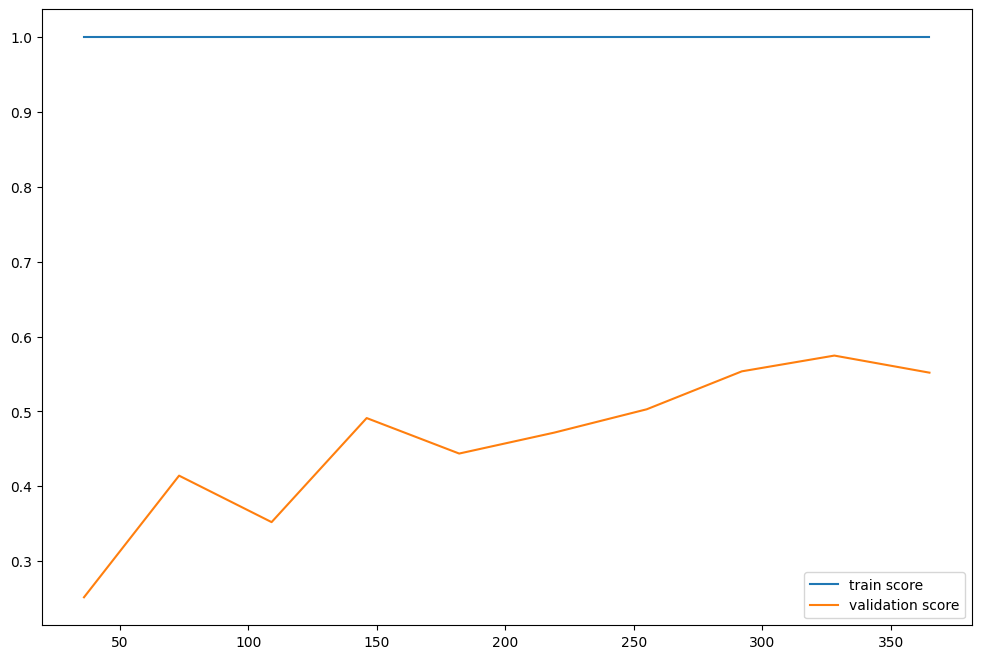

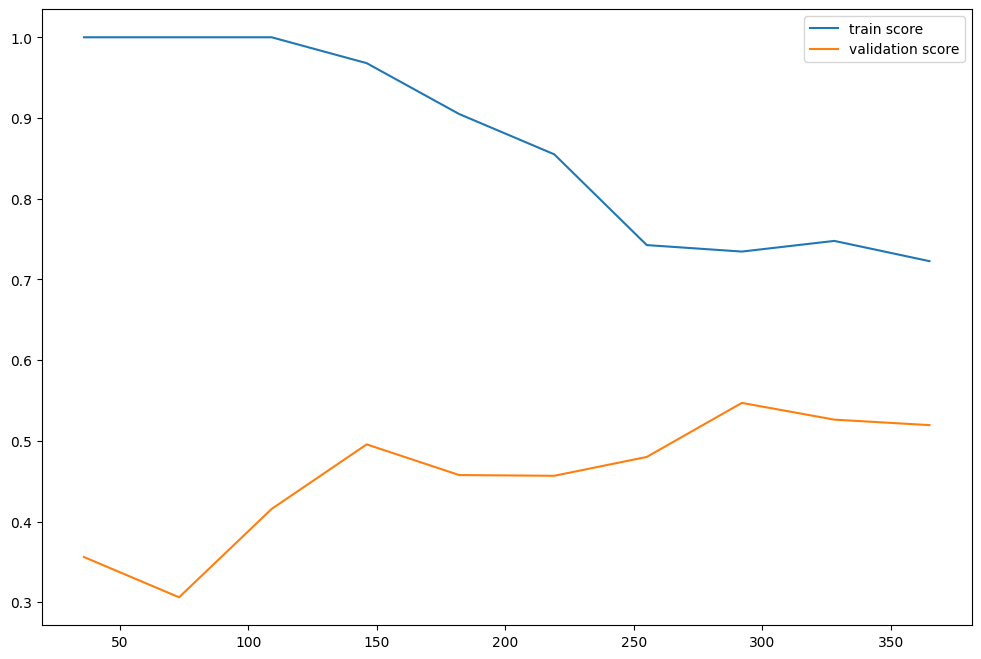

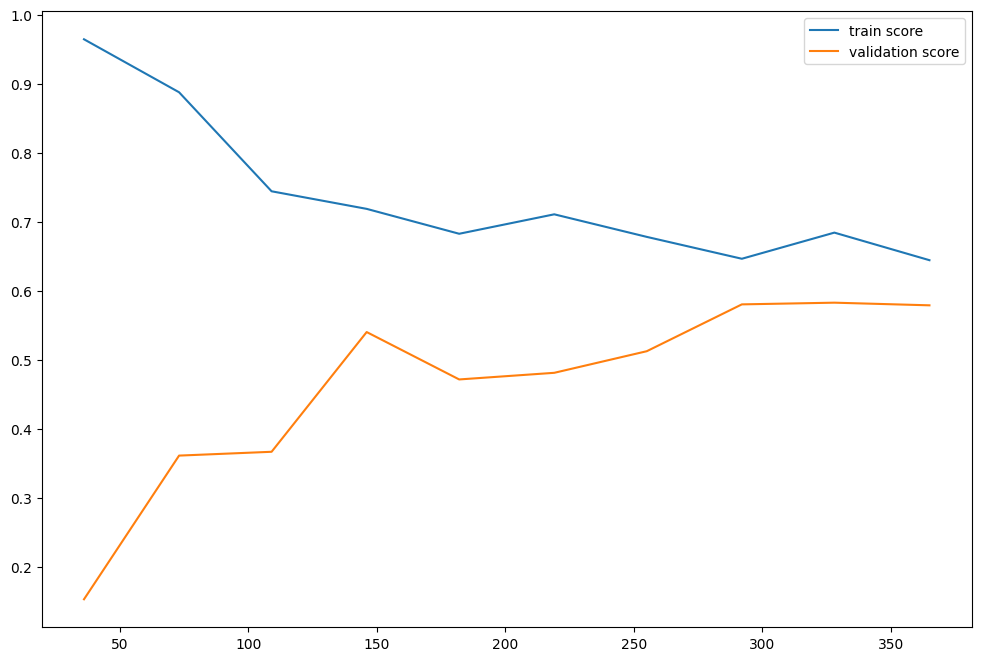

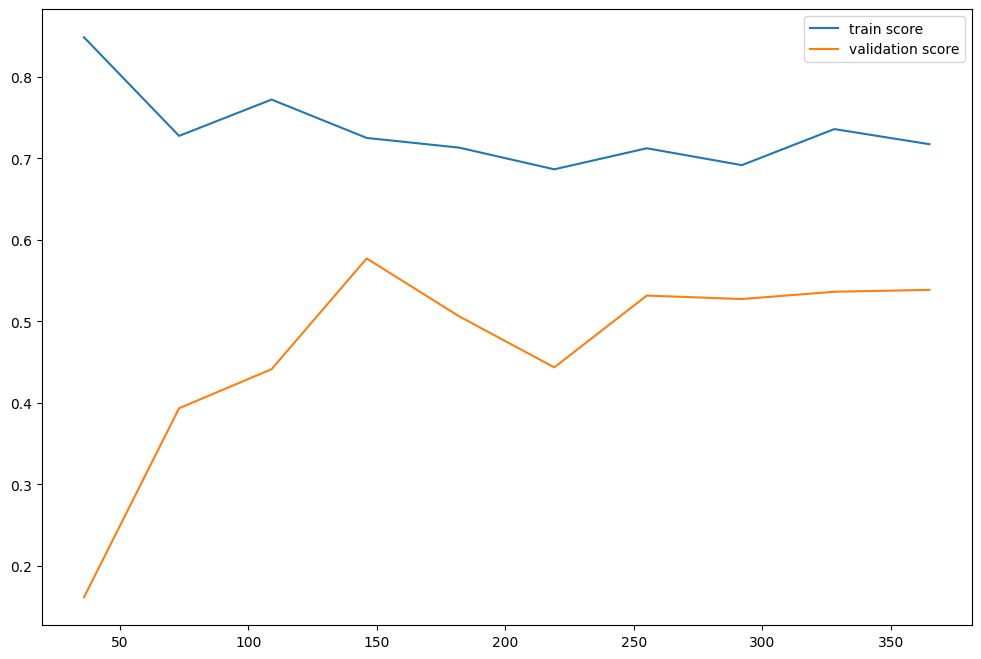

In [113]:
for name, model in dict_of_models.items():
  print(name)
  evaluation1(model)

**T0:** Nous cherchons les modèles qui obtiennent les meilleurs f1-score donc, avec les paramètres de bases nous obtenons:
- RandomForest: f1-score -> 40%, **nous laissons ce modèle de côté**.
- AdaBoost: f1-score -> 43%, n'est plus en over-fitting, nous pouvons observer sur le graph que le train score a chuté mais il se rapproche du test score. **Ce modèle peut donc être très bon**.
- SVM: f1-score -> 48%, n'est plus en over-fitting, nous pouvons observer sur le graph que le train score a chuté mais il se rapproche du test score. **Ce modèle peut donc être très bon**.
- KNN: f1-score -> 52%, même remarque que le SVM quant à l'over-fitting. Cependant, à ce stade **nous laissons ce modèle de côté** car il est basé sur les instances, les données qu'on lui fournit.



## Optimisation

In [114]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Nous nous concentrons sur SVM.

In [115]:
SVM.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                   ('selectkbest', SelectKBest())])),
  ('standardscaler', StandardScaler()),
  ('svc', SVC(random_state=0))],
 'transform_input': None,
 'verbose': False,
 'pipeline': Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                 ('selectkbest', SelectKBest())]),
 'standardscaler': StandardScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('polynomialfeatures',
   PolynomialFeatures(include_bias=False)),
  ('selectkbest', SelectKBest())],
 'pipeline__transform_input': None,
 'pipeline__verbose': False,
 'pipeline__polynomialfeatures': PolynomialFeatures(include_bias=False),
 'pipeline__selectkbest': SelectKBest(),
 'pipeline__polynomialfeatures__degree': 2,
 'pipeline__polynomialfeatures__include_bias': False,
 'pipeline__polynomialfeatures__interaction_only': False,
 'pipelin

Les hyper-paramètres qui nous intéressent sont 'C' et 'gamma'.

In [173]:
hyper_params = {'svc__gamma' : [1e-3, 1e-4],
               'svc__C' : [1, 10, 100, 1000],
                #O2:
                'pipeline__polynomialfeatures__degree': [2, 3, 4],
                #'pipeline__selectkbest__k': range(4, 100)
                #03:
                'pipeline__selectkbest__k': range(40, 60)
              }

In [174]:
#O1:
#grid = GridSearchCV(SVM, hyper_params, cv=4, scoring='recall')

#O2:
grid = RandomizedSearchCV(SVM, hyper_params, cv=4, scoring='recall', n_iter=40)
#

#Train the grid
grid.fit(X_train, y_train)

#Show best params
print(grid.best_params_)

#Predict vector
y_pred = grid.predict(X_test)

#Show result
print(classification_report(y_test, y_pred))

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 51, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



Nous obtenons f1-score = 54%, recall = 44%. Nous avons donc une amélioration du f1-score et du recall.

Nous allons passer ce modèle dans notre fonction evaluation1():

[[89  6]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        95
           1       0.57      0.50      0.53        16

    accuracy                           0.87       111
   macro avg       0.74      0.72      0.73       111
weighted avg       0.87      0.87      0.87       111



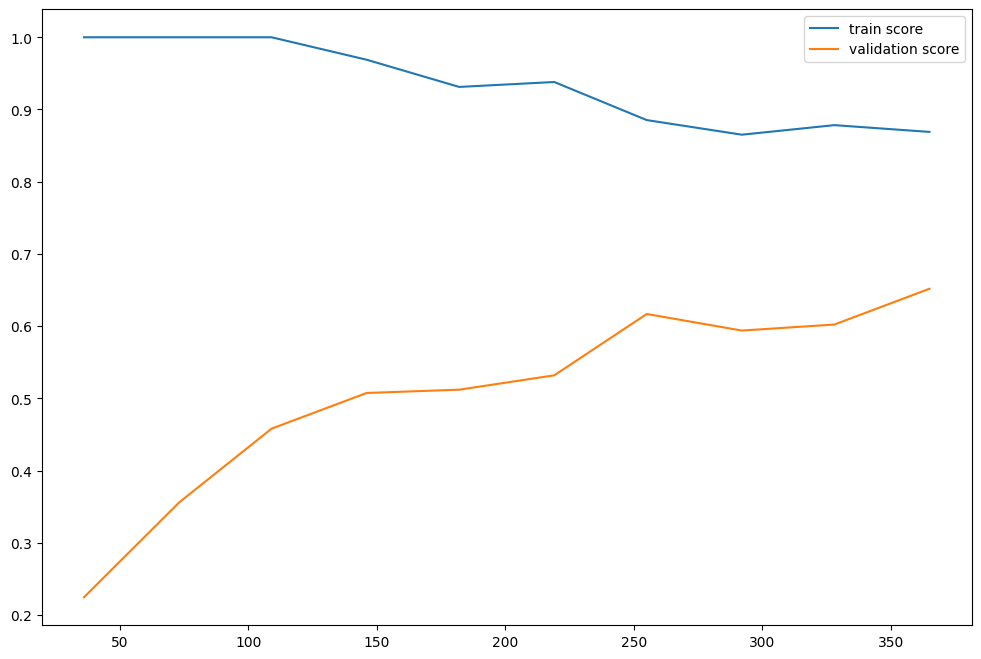

In [175]:
evaluation1(grid.best_estimator_)

O1: Nous observons que la courbe du train score diminue alors que la courbe du validation score augmente. Nous commençons à atteindre un palier où les 2 courbes se rejoignent ce qui nous indique que le modèle n'est pas en over-fitting.

O2: Nous devons cependant continuer d'optimiser notre modèle. Nous pourrions tester un GridSearchCV() sur tous les hyper-paramètres mais cela prendrait beaucoup trop de temps à l'ordinateur. Nous allons donc utiliser un outil de sklearn.model_selection: RandomizedSearchCV qui cherche de manière aléatoire des combinaisons parmi tous les hyper-paramètres qui se trouvent dans hyper_params. Avec 'gamma' = 0.001; 'c' = 1000, 'k' = 72, 'degree' = 3, nous sommes arrivés à recall = 50% et f1-score = 50%.

O3: Nous avons réduit le domaine de 'k' : 'k' = range(40, 60). Avec 'gamma' = 0.001; 'c' = 1000, 'k' = 51, 'degree' = 3, nous sommes arrivés à recall = 50% et f1-score = 53%.

## Precision Recall Curve

La fonction precision_recall_curve du module sklearn.metrics permet de visualiser la future precision ou le futur recall de notre modèle en fonction d'un seuil (threshold) de prédiction que nous définissons. La visualisation nous permet donc de définir le meilleur seuil possible.


In [176]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, recall_score

In [177]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

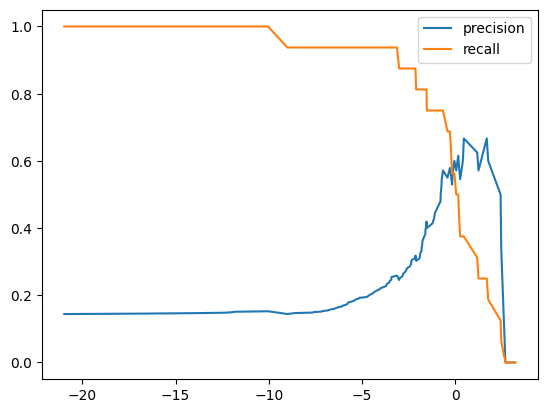

In [178]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

Nous observons que si nous prenons un seuil à -15, recall = 100% mais precision = 17%, mais c'est un mauvais compromis car il suffit simplement de dire que tout le monde a le COVID et ce n'est pas une réussite. Le bon compromis entre precision et recall est en général trouvable grâce au f1-score, c'est en général au croisement des 2 courbes.
Cependant, selon l'objectif initial de notre projet, nous savons que nous pouvons nous permettre de sacrifier un peu de precision pour avoir un meilleur recall.
Nous allons donc tenter threshold autour de -1, ce qui semble nous donner un precision pas trop mauvaise avec un recall > 70%.

## Prise de décision

Nous allons donc définir une fonction qui va englober notre modèle, qui sera la véritable fonction de prédiction:

In [179]:
def model_final(model, X, threshold=0):
  return model.decision_function(X) > threshold

In [201]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-0.7)

In [202]:
f1_score(y_test, y_pred)

0.6486486486486487

In [203]:
recall_score(y_test, y_pred)

0.75

**Avec SVM; 'gamma' = 0.001; 'c' = 1000, 'k' = 51, 'degree' = 3; threshold = -0.7:**
Dans nos objectifs nous voulions f1-score = 50%, nous sommes arrivés à 64.9%, **objectif atteint**.
De plus, nous voulions recall = 70%, nous sommes arrivés à 75%, **objectif atteint**.